# Holmusk Data Challenge

### Objective: To find insights about the drivers of cost of care for a certain condition that patients are hospitalised for. 


In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [248]:
bill_amount = pd.read_csv('bill_amount.csv')
bill_id = pd.read_csv('bill_id.csv')
clinical_data = pd.read_csv('clinical_data.csv')
demographics = pd.read_csv('demographics.csv')

## Data Cleaning

In [249]:
bill_amount.head()

bill_id       amount
0    40315104  1552.634830
1  2660045161  1032.011951
2  1148334643  6469.605351
3  3818426276   755.965425
4  9833541918   897.347816

In [250]:
bill_amount.shape

(13600, 2)

In [251]:
bill_id.head()

bill_id                        patient_id date_of_admission
0  7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01
1  6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
2  7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01
3  3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
4  7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01

In [252]:
bill_id.shape

(13600, 3)

In [253]:
clinical_data.head()

id date_of_admission date_of_discharge  \
0  1d21f2be18683991eb93d182d6b2d220        2011-01-01        2011-01-11   
1  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01        2011-01-11   
2  c85cf97bc6307ded0dd4fef8bad2fa09        2011-01-02        2011-01-13   
3  e0397dd72caf4552c5babebd3d61736c        2011-01-02        2011-01-14   
4  94ade3cd5f66f4584902554dff170a29        2011-01-08        2011-01-16   

   medical_history_1  medical_history_2 medical_history_3  medical_history_4  \
0                  0                1.0                 0                  0   
1                  0                0.0                 0                  0   
2                  0                0.0                 0                  0   
3                  0                1.0                No                  0   
4                  0                0.0                No                  0   

   medical_history_5  medical_history_6  medical_history_7  ...  symptom_1  \
0                0.0                  0                  0  ...          0   
1                0.0                  0                  0  ...          0   
2                0.0                  0                  0  ...          1   
3                0.0                  1                  1  ...          1   
4                0.0                  1                  1  ...          0   

   symptom_2  symptom_3  symptom_4  symptom_5  lab_result_1  lab_result_2  \
0          0          0          1          1          13.2          30.9   
1          0          1          1          1          13.8          22.6   
2          1          1          1          0          11.2          26.2   
3          1          1          1          1          13.3          28.4   
4          1          0          1          0          12.0          27.8   

   lab_result_3  weight  height  
0         123.0    71.3   161.0  
1          89.0    78.4   160.0  
2         100.0    72.0   151.0  
3          76.0    64.4   152.0  
4          87.0    55.6   160.0  

[5 rows x 26 columns]

In [254]:
clinical_data.shape

(3400, 26)

In [255]:
categorical_cols = clinical_data.iloc[:,3:21]

categorical_cols.medical_history_3.value_counts()

0      2176
No      761
1       348
Yes     115
Name: medical_history_3, dtype: int64

In [256]:
# Replace 'No' and 'Yes' values with 0 and 1

clinical_data.medical_history_3 = clinical_data.medical_history_3.replace('No',0)
clinical_data.medical_history_3 = clinical_data.medical_history_3.replace('Yes',1)

clinical_data = clinical_data.rename(columns={'id':'patient_id'})

In [257]:
# Replace NA values in medical_history_2 & medical_history_5 with 0

clinical_data.medical_history_2 = clinical_data.medical_history_2.fillna(value=0)
clinical_data.medical_history_5 = clinical_data.medical_history_5.fillna(value=0)

print(clinical_data.medical_history_2.value_counts())
print(clinical_data.medical_history_5.value_counts())

0.0    2414
1.0     986
Name: medical_history_2, dtype: int64
0.0    3202
1.0     198
Name: medical_history_5, dtype: int64


In [258]:
demographics.head()

patient_id  gender     race    resident_status  \
0  fa2d818b2261e44e30628ad1ac9cc72c  Female   Indian        Singaporean   
1  5b6477c5de78d0b138e3b0c18e21d0ae       f  Chinese  Singapore citizen   
2  320aa16c61937447fd6631bf635e7fde    Male  Chinese  Singapore citizen   
3  c7f3881684045e6c49020481020fae36    Male    Malay  Singapore citizen   
4  541ad077cb4a0e64cc422673afe28aef       m  Chinese        Singaporean   

  date_of_birth  
0    1971-05-14  
1    1976-02-18  
2    1982-07-03  
3    1947-06-15  
4    1970-12-12

In [259]:
demographics.shape

(3000, 5)

In [260]:
# Standardize column values (eg f and Female)

demographics.gender = demographics.gender.replace('f','Female')
demographics.gender = demographics.gender.replace('m','Male')
demographics.race = demographics.race.replace('India','Indian')
demographics.race = demographics.race.replace('chinese','Chinese')
demographics.resident_status = demographics.resident_status.replace ('Singapore citizen','Singaporean')

demographics

patient_id  gender     race resident_status  \
0     fa2d818b2261e44e30628ad1ac9cc72c  Female   Indian     Singaporean   
1     5b6477c5de78d0b138e3b0c18e21d0ae  Female  Chinese     Singaporean   
2     320aa16c61937447fd6631bf635e7fde    Male  Chinese     Singaporean   
3     c7f3881684045e6c49020481020fae36    Male    Malay     Singaporean   
4     541ad077cb4a0e64cc422673afe28aef    Male  Chinese     Singaporean   
...                                ...     ...      ...             ...   
2995  0ba769860b060834b8c728ad26137c7f  Female    Malay              PR   
2996  a27a55b92a7afd9cfc427085a2734385  Female    Malay     Singaporean   
2997  c17a0f4c4f3931bed36081fabf501396    Male   Indian     Singaporean   
2998  c5ca8e8bfd744a1ef6f77318bcb591b4  Female  Chinese     Singaporean   
2999  20b609609d4dbb834d722ddf29f18879    Male  Chinese     Singaporean   

     date_of_birth  
0       1971-05-14  
1       1976-02-18  
2       1982-07-03  
3       1947-06-15  
4       1970-12-12  
...            ...  
2995    1948-01-02  
2996    1942-03-08  
2997    1964-01-02  
2998    1973-04-19  
2999    1986-09-04  

[3000 rows x 5 columns]

## Pre-Processing of Dataframes

### Combine Datasets

In [261]:
# Combine bill dataframes together

bill_df = bill_id.merge(bill_amount, on='bill_id', how='inner')

bill_df

bill_id                        patient_id date_of_admission  \
0      7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
1      6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
2      7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
3      3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
4      7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
...           ...                               ...               ...   
13595  1641053864  a4c61deaa9ce86b4d2289eab6128b872        2015-12-28   
13596  6956955826  ac52a32f8ce8c46d82df2d72052ae5a9        2015-12-28   
13597  1399259594  4f67a54ab205cc9e7e2b0a4ee08e4fba        2015-12-28   
13598  9243628699  a4c61deaa9ce86b4d2289eab6128b872        2015-12-28   
13599  4808173213  a4c61deaa9ce86b4d2289eab6128b872        2015-12-28   

             amount  
0        951.214467  
1      19900.297086  
2      12338.269972  
3       1145.372193  
4       1133.601902  
...             ...  
13595   1047.298193  
13596   2729.043717  
13597   3292.570409  
13598   9067.250936  
13599   1019.523791  

[13600 rows x 4 columns]

In [262]:
# Combine bill amounts for rows with same patient_id and date_of_admission

bill_total_df = bill_df.groupby(['patient_id','date_of_admission'], as_index=False)['amount'].sum()

bill_total_df

patient_id date_of_admission        amount
0     00225710a878eff524a1d13be817e8e2        2014-04-10   5190.566695
1     0029d90eb654699c18001c17efb0f129        2012-11-07  22601.497872
2     0040333abd68527ecb53e1db9073f52e        2013-01-19  17447.181635
3     00473b58e3dc8ae37b3cb34069705083        2014-02-10  15285.883220
4     0078662d1d983dde68ea057c42d5b5cf        2012-04-28  73477.869010
...                                ...               ...           ...
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3        2011-04-24   4676.066179
3396  ffac3c4b6838f42625e1dd00dd7c867b        2015-11-28  14049.042774
3397  ffc19537fa6621512ef4f296d60896ce        2013-05-05  30053.620971
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed        2012-12-24  28007.636468
3399  ffd9644f8daf1d28493a7cd700bb30f4        2013-06-04  21040.661990

[3400 rows x 3 columns]

In [263]:
# Combine bill_total_df with clinical_data

combined_df1 = pd.merge(bill_total_df, clinical_data, how='inner', left_on=['patient_id','date_of_admission'], right_on=['patient_id','date_of_admission'] )

In [264]:
combined_df1

patient_id date_of_admission        amount  \
0     00225710a878eff524a1d13be817e8e2        2014-04-10   5190.566695   
1     0029d90eb654699c18001c17efb0f129        2012-11-07  22601.497872   
2     0040333abd68527ecb53e1db9073f52e        2013-01-19  17447.181635   
3     00473b58e3dc8ae37b3cb34069705083        2014-02-10  15285.883220   
4     0078662d1d983dde68ea057c42d5b5cf        2012-04-28  73477.869010   
...                                ...               ...           ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3        2011-04-24   4676.066179   
3396  ffac3c4b6838f42625e1dd00dd7c867b        2015-11-28  14049.042774   
3397  ffc19537fa6621512ef4f296d60896ce        2013-05-05  30053.620971   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed        2012-12-24  28007.636468   
3399  ffd9644f8daf1d28493a7cd700bb30f4        2013-06-04  21040.661990   

     date_of_discharge  medical_history_1  medical_history_2  \
0           2014-04-22                  0                0.0   
1           2012-11-20                  0                1.0   
2           2013-01-31                  0                1.0   
3           2014-02-15                  1                0.0   
4           2012-05-10                  0                1.0   
...                ...                ...                ...   
3395        2011-05-04                  0                1.0   
3396        2015-12-07                  0                0.0   
3397        2013-05-15                  0                1.0   
3398        2013-01-01                  0                0.0   
3399        2013-06-15                  0                0.0   

     medical_history_3  medical_history_4  medical_history_5  \
0                    0                  0                0.0   
1                    0                  0                0.0   
2                    0                  0                0.0   
3                    0                  0                0.0   
4                    0                  0                0.0   
...                ...                ...                ...   
3395                 0                  0                0.0   
3396                 0                  0                0.0   
3397                 0                  0                1.0   
3398                 0                  0                0.0   
3399                 0                  0                0.0   

      medical_history_6  ...  symptom_1  symptom_2  symptom_3  symptom_4  \
0                     0  ...          0          0          1          0   
1                     1  ...          0          1          0          0   
2                     0  ...          0          1          0          0   
3                     0  ...          0          1          1          1   
4                     1  ...          0          1          0          1   
...                 ...  ...        ...        ...        ...        ...   
3395                  0  ...          0          0          0          0   
3396                  0  ...          1          1          0          1   
3397                  0  ...          0          0          1          1   
3398                  0  ...          1          1          1          1   
3399                  0  ...          1          0          1          1   

      symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  height  
0             0          13.4          27.9          96.0    66.9   155.0  
1             1          16.7          26.5         109.0    89.1   160.0  
2             1          14.8          25.2          96.0    79.5   172.0  
3             0          14.9          28.7         122.0    81.1   160.0  
4             1          14.2          27.2          89.0    74.7   173.0  
...         ...           ...           ...           ...     ...     ...  
3395          0          16.3          27.4          86.0    69.3   162.0  
3396          0          16.0          26.7         121.0    99.6   178.0  
3397

In [265]:
# Combine with demographics data

master_df = combined_df1.merge(demographics, how='left', on='patient_id')

master_df


patient_id date_of_admission        amount  \
0     00225710a878eff524a1d13be817e8e2        2014-04-10   5190.566695   
1     0029d90eb654699c18001c17efb0f129        2012-11-07  22601.497872   
2     0040333abd68527ecb53e1db9073f52e        2013-01-19  17447.181635   
3     00473b58e3dc8ae37b3cb34069705083        2014-02-10  15285.883220   
4     0078662d1d983dde68ea057c42d5b5cf        2012-04-28  73477.869010   
...                                ...               ...           ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3        2011-04-24   4676.066179   
3396  ffac3c4b6838f42625e1dd00dd7c867b        2015-11-28  14049.042774   
3397  ffc19537fa6621512ef4f296d60896ce        2013-05-05  30053.620971   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed        2012-12-24  28007.636468   
3399  ffd9644f8daf1d28493a7cd700bb30f4        2013-06-04  21040.661990   

     date_of_discharge  medical_history_1  medical_history_2  \
0           2014-04-22                  0                0.0   
1           2012-11-20                  0                1.0   
2           2013-01-31                  0                1.0   
3           2014-02-15                  1                0.0   
4           2012-05-10                  0                1.0   
...                ...                ...                ...   
3395        2011-05-04                  0                1.0   
3396        2015-12-07                  0                0.0   
3397        2013-05-15                  0                1.0   
3398        2013-01-01                  0                0.0   
3399        2013-06-15                  0                0.0   

     medical_history_3  medical_history_4  medical_history_5  \
0                    0                  0                0.0   
1                    0                  0                0.0   
2                    0                  0                0.0   
3                    0                  0                0.0   
4                    0                  0                0.0   
...                ...                ...                ...   
3395                 0                  0                0.0   
3396                 0                  0                0.0   
3397                 0                  0                1.0   
3398                 0                  0                0.0   
3399                 0                  0                0.0   

      medical_history_6  ...  symptom_5  lab_result_1  lab_result_2  \
0                     0  ...          0          13.4          27.9   
1                     1  ...          1          16.7          26.5   
2                     0  ...          1          14.8          25.2   
3                     0  ...          0          14.9          28.7   
4                     1  ...          1          14.2          27.2   
...                 ...  ...        ...           ...           ...   
3395                  0  ...          0          16.3          27.4   
3396                  0  ...          0          16.0          26.7   
3397                  0  ...          1          16.7          30.1   
3398                  0  ...          0          16.4          33.6   
3399                  0  ...          1          13.9          26.9   

      lab_result_3  weight  height  gender     race  resident_status  \
0             96.0    66.9   155.0  Female  Chinese      Singaporean   
1            109.0    89.1   160.0  Female  Chinese      Singaporean   
2             96.0    79.5   172.0    Male   Indian      Singaporean   
3            122.0    81.1   160.0  Female  Chinese      Singaporean   
4             89.0    74.7   173.0    Male    Malay        Foreigner   
...            ...     ...     ...     ...      ...              ...   
3395          86.0    69.3   162.0  Female   Indian      Singaporean   
3396         121.0    99.6   178.0    Male  Chinese      Singaporean   
3397         107.0    83.1   170.0    Male  Chinese               PR   
3398          96.0    81.3  

In [266]:
# reorder columns

cols = list(master_df.columns.values)

cols = [cols[0]] + cols[-6:] + cols[1:-6]

cols = [cols[0]] + cols[3:5] + cols[1:3] + cols[5:8] + [cols[9]] + [cols[8]] + cols[10:]

cols

['patient_id',
 'gender',
 'race',
 'weight',
 'height',
 'resident_status',
 'date_of_birth',
 'date_of_admission',
 'date_of_discharge',
 'amount',
 'medical_history_1',
 'medical_history_2',
 'medical_history_3',
 'medical_history_4',
 'medical_history_5',
 'medical_history_6',
 'medical_history_7',
 'preop_medication_1',
 'preop_medication_2',
 'preop_medication_3',
 'preop_medication_4',
 'preop_medication_5',
 'preop_medication_6',
 'symptom_1',
 'symptom_2',
 'symptom_3',
 'symptom_4',
 'symptom_5',
 'lab_result_1',
 'lab_result_2',
 'lab_result_3']

In [267]:
master_df = master_df[cols]

master_df

patient_id  gender     race  weight  height  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese    66.9   155.0   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese    89.1   160.0   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian    79.5   172.0   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese    81.1   160.0   
4     0078662d1d983dde68ea057c42d5b5cf    Male    Malay    74.7   173.0   
...                                ...     ...      ...     ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian    69.3   162.0   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese    99.6   178.0   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese    83.1   170.0   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay    81.3   161.0   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese    70.7   165.0   

     resident_status date_of_birth date_of_admission date_of_discharge  \
0        Singaporean    1983-01-16        2014-04-10        2014-04-22   
1        Singaporean    1943-10-14        2012-11-07        2012-11-20   
2        Singaporean    1972-08-26        2013-01-19        2013-01-31   
3        Singaporean    1976-07-23        2014-02-10        2014-02-15   
4          Foreigner    1942-10-19        2012-04-28        2012-05-10   
...              ...           ...               ...               ...   
3395     Singaporean    1976-08-07        2011-04-24        2011-05-04   
3396     Singaporean    1963-10-07        2015-11-28        2015-12-07   
3397              PR    1938-09-12        2013-05-05        2013-05-15   
3398     Singaporean    1950-06-06        2012-12-24        2013-01-01   
3399     Singaporean    1956-04-02        2013-06-04        2013-06-15   

            amount  ...  preop_medication_5  preop_medication_6 symptom_1  \
0      5190.566695  ...                   0                   0         0   
1     22601.497872  ...                   1                   0         0   
2     17447.181635  ...                   1                   0         0   
3     15285.883220  ...                   1                   0         0   
4     73477.869010  ...                   1                   0         0   
...            ...  ...                 ...                 ...       ...   
3395   4676.066179  ...                   1                   0         0   
3396  14049.042774  ...                   1                   1         1   
3397  30053.620971  ...                   1                   1         0   
3398  28007.636468  ...                   1                   0         1   
3399  21040.661990  ...                   1                   1         1   

      symptom_2  symptom_3  symptom_4  symptom_5  lab_result_1  lab_result_2  \
0             0          1          0          0          13.4          27.9   
1             1          0          0          1          16.7          26.5   
2             1          0          0          1          14.8          25.2   
3             1          1          1          0          14.9          28.7   
4             1          0          1          1          14.2          27.2   
...         ...        ...        ...        ...           ...           ...   
3395          0          0          0          0          16.3          27.4   
3396          1          0          1          0          16.0          26.7   
3397          0          1          1          1          16.7          30.1   
3398          1          1          1          0          16.4          33.6   
3399          0          1          1          1          13.9          26.9   

      lab_result_3  
0             96.0  
1            109.0  
2             96.0  
3            122.0  
4             89.0  
...            ...  
3395          86.0  
3396         121.0  
3397         107.0  
3398          96.0  
3399          95.0  

[3400 rows x 31 columns]

In [268]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3400 non-null   object 
 1   gender              3400 non-null   object 
 2   race                3400 non-null   object 
 3   weight              3400 non-null   float64
 4   height              3400 non-null   float64
 5   resident_status     3400 non-null   object 
 6   date_of_birth       3400 non-null   object 
 7   date_of_admission   3400 non-null   object 
 8   date_of_discharge   3400 non-null   object 
 9   amount              3400 non-null   float64
 10  medical_history_1   3400 non-null   int64  
 11  medical_history_2   3400 non-null   float64
 12  medical_history_3   3400 non-null   object 
 13  medical_history_4   3400 non-null   int64  
 14  medical_history_5   3400 non-null   float64
 15  medical_history_6   3400 non-null   int64  
 16  medica

In [506]:
# Change dtypes of some columns

date_cols = ['date_of_birth','date_of_admission','date_of_discharge']

for date in date_cols:
    master_df[date] = pd.to_datetime(master_df[date])
    
medical_cols = ['medical_history_2','medical_history_5']

for med in medical_cols:
    master_df[med] = master_df[med].astype('int64')
    
master_df['medical_history_3'] = master_df['medical_history_3'].astype('int64')

In [271]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          3400 non-null   object        
 1   gender              3400 non-null   object        
 2   race                3400 non-null   object        
 3   weight              3400 non-null   float64       
 4   height              3400 non-null   float64       
 5   resident_status     3400 non-null   object        
 6   date_of_birth       3400 non-null   datetime64[ns]
 7   date_of_admission   3400 non-null   datetime64[ns]
 8   date_of_discharge   3400 non-null   datetime64[ns]
 9   amount              3400 non-null   float64       
 10  medical_history_1   3400 non-null   int64         
 11  medical_history_2   3400 non-null   int64         
 12  medical_history_3   3400 non-null   int64         
 13  medical_history_4   3400 non-null   int64       

### Feature Engineering

In [507]:
# Create age column at age of hospital admission

master_df['age'] = master_df['date_of_admission'] - master_df['date_of_birth']
master_df['age'] = master_df['age'] / np.timedelta64(1, 'Y')

master_df

patient_id  gender     race        age  weight  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese  31.231305    66.9   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese  69.069180    89.1   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian  40.400556    79.5   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese  37.553133    81.1   
4     0078662d1d983dde68ea057c42d5b5cf    Male    Malay  69.526411    74.7   
...                                ...     ...      ...        ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese  52.143439    99.6   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese  74.646297    83.1   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay  62.552961    81.3   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese  57.172974    70.7   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
0      155.0  27.845994     Singaporean    1983-01-16        2014-04-10  ...   
1      160.0  34.804687     Singaporean    1943-10-14        2012-11-07  ...   
2      172.0  26.872634     Singaporean    1972-08-26        2013-01-19  ...   
3      160.0  31.679687     Singaporean    1976-07-23        2014-02-10  ...   
4      173.0  24.959070       Foreigner    1942-10-19        2012-04-28  ...   
...      ...        ...             ...           ...               ...  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
3396   178.0  31.435425     Singaporean    1963-10-07        2015-11-28  ...   
3397   170.0  28.754325              PR    1938-09-12        2013-05-05  ...   
3398   161.0  31.364531     Singaporean    1950-06-06        2012-12-24  ...   
3399   165.0  25.968779     Singaporean    1956-04-02        2013-06-04  ...   

     medical_history_3  medical_history_4  medical_history_5  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
...                ...                ...                ...   
3395                 0                  0                  0   
3396                 0                  0                  0   
3397                 0                  0                  1   
3398                 0                  0                  0   
3399                 0                  0                  0   

      medical_history_6  medical_history_7  symptom_1  symptom_2  symptom_3  \
0                     0                  1          0          0          1   
1                     1                  0          0          1          0   
2                     0                  1          0          1          0   
3                     0                  0          0          1          1   
4                     1                  0          0          1          0   
...                 ...                ...        ...        ...        ...   
3395                  0                  1          0          0          0   
3396                  0                  0          1          1          0   
3397                  0                  0          0          0          1   
3398                  0                  0          1          1          1   
3399                  0                  1          1          0          1   

      symptom_4  symptom_5  
0             0          0  
1             0          1  
2             0          1  
3             1          0  
4             1          1  
...         ...        ...  
3395          0          0  
3396          1          0  
3397          1          1  
3398          1          0  
3399          1          1  

[3400 rows x 34 columns]

In [273]:
# Create BMI column 

# BMI = kg/m^2 (where kg=weight in kilograms and m=height in metres)

master_df['bmi'] = master_df.apply(lambda x: ((x.weight/x.height**2)*10000), axis = 1)

In [318]:
# Create duration of hospitalisation stay column

master_df['stay_duration'] = master_df['date_of_discharge'] - master_df['date_of_admission']
master_df['stay_duration'] = (master_df['stay_duration']/ np.timedelta64(1, 'D')).astype(int)

master_df.dtypes

patient_id                    object
gender                        object
race                          object
age                          float64
weight                       float64
height                       float64
bmi                          float64
resident_status               object
date_of_birth         datetime64[ns]
date_of_admission     datetime64[ns]
date_of_discharge     datetime64[ns]
stay_duration                  int64
amount                       float64
lab_result_1                 float64
lab_result_2                 float64
lab_result_3                 float64
preop_medication_1             int64
preop_medication_2             int64
preop_medication_3             int64
preop_medication_4             int64
preop_medication_5             int64
preop_medication_6             int64
medical_history_1              int64
medical_history_2              int64
medical_history_3              int64
medical_history_4              int64
medical_history_5              int64
m

In [319]:
# Reorder columns

cols_list = ['patient_id','gender','race','age','weight','height','bmi','resident_status',
             'date_of_birth','date_of_admission','date_of_discharge','stay_duration','amount',
             'lab_result_1','lab_result_2','lab_result_3',
             'preop_medication_1','preop_medication_2','preop_medication_3',
             'preop_medication_4','preop_medication_5','preop_medication_6',
             'medical_history_1','medical_history_2','medical_history_3','medical_history_4',
             'medical_history_5','medical_history_6','medical_history_7',
             'symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']

master_df = master_df[cols_list]

master_df

patient_id  gender     race        age  weight  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese  31.231305    66.9   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese  69.069180    89.1   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian  40.400556    79.5   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese  37.553133    81.1   
4     0078662d1d983dde68ea057c42d5b5cf    Male    Malay  69.526411    74.7   
...                                ...     ...      ...        ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese  52.143439    99.6   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese  74.646297    83.1   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay  62.552961    81.3   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese  57.172974    70.7   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
0      155.0  27.845994     Singaporean    1983-01-16        2014-04-10  ...   
1      160.0  34.804687     Singaporean    1943-10-14        2012-11-07  ...   
2      172.0  26.872634     Singaporean    1972-08-26        2013-01-19  ...   
3      160.0  31.679687     Singaporean    1976-07-23        2014-02-10  ...   
4      173.0  24.959070       Foreigner    1942-10-19        2012-04-28  ...   
...      ...        ...             ...           ...               ...  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
3396   178.0  31.435425     Singaporean    1963-10-07        2015-11-28  ...   
3397   170.0  28.754325              PR    1938-09-12        2013-05-05  ...   
3398   161.0  31.364531     Singaporean    1950-06-06        2012-12-24  ...   
3399   165.0  25.968779     Singaporean    1956-04-02        2013-06-04  ...   

     medical_history_3  medical_history_4  medical_history_5  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
...                ...                ...                ...   
3395                 0                  0                  0   
3396                 0                  0                  0   
3397                 0                  0                  1   
3398                 0                  0                  0   
3399                 0                  0                  0   

      medical_history_6  medical_history_7  symptom_1  symptom_2  symptom_3  \
0                     0                  1          0          0          1   
1                     1                  0          0          1          0   
2                     0                  1          0          1          0   
3                     0                  0          0          1          1   
4                     1                  0          0          1          0   
...                 ...                ...        ...        ...        ...   
3395                  0                  1          0          0          0   
3396                  0                  0          1          1          0   
3397                  0                  0          0          0          1   
3398                  0                  0          1          1          1   
3399                  0                  1          1          0          1   

      symptom_4  symptom_5  
0             0          0  
1             0          1  
2             0          1  
3             1          0  
4             1          1  
...         ...        ...  
3395          0          0  
3396          1          0  
3397          1          1  
3398          1          0  
3399          1          1  

[3400 rows x 34 columns]

## Exploratory Data Analysis

In [320]:
master_df_a = master_df.iloc[:,:18]
master_df_b = master_df.iloc[:,18:]

master_df_a.describe()

age       weight       height          bmi  stay_duration  \
count  3400.000000  3400.000000  3400.000000  3400.000000    3400.000000   
mean     52.540609    78.748441   165.084412    28.958874      11.051176   
std      14.697767    10.975076     6.973678     4.140674       2.850140   
min      21.714340    48.000000   151.000000    17.508651       1.000000   
25%      39.633257    71.200000   160.000000    26.156074       9.000000   
50%      50.773116    78.900000   165.000000    28.943985      11.000000   
75%      64.996543    86.300000   170.000000    31.713345      13.000000   
max      85.241997   121.000000   186.000000    46.677349      20.000000   

             amount  lab_result_1  lab_result_2  lab_result_3  \
count   3400.000000   3400.000000   3400.000000   3400.000000   
mean   21859.071130     14.469882     27.431529     99.489706   
std    10155.336753      1.747323      2.463844     15.254453   
min     2946.100354      9.100000     19.700000     52.000000   
25%    14793.370831     13.200000     25.800000     88.000000   
50%    20180.020614     14.500000     27.400000    100.000000   
75%    26680.292435     15.800000     29.100000    110.000000   
max    98723.854994     20.300000     35.100000    150.000000   

       preop_medication_1  preop_medication_2  
count         3400.000000         3400.000000  
mean             0.503824            0.591176  
std              0.500059            0.491689  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%              1.000000            1.000000  
75%              1.000000            1.000000  
max              1.000000            1.000000

In [321]:
master_df_b.describe()

preop_medication_3  preop_medication_4  preop_medication_5  \
count         3400.000000         3400.000000         3400.000000   
mean             0.820882            0.523235            0.819706   
std              0.383507            0.499533            0.384489   
min              0.000000            0.000000            0.000000   
25%              1.000000            0.000000            1.000000   
50%              1.000000            1.000000            1.000000   
75%              1.000000            1.000000            1.000000   
max              1.000000            1.000000            1.000000   

       preop_medication_6  medical_history_1  medical_history_2  \
count         3400.000000        3400.000000        3400.000000   
mean             0.744118           0.169118           0.290000   
std              0.436420           0.374911           0.453829   
min              0.000000           0.000000           0.000000   
25%              0.000000           0.000000           0.000000   
50%              1.000000           0.000000           0.000000   
75%              1.000000           0.000000           1.000000   
max              1.000000           1.000000           1.000000   

       medical_history_3  medical_history_4  medical_history_5  \
count        3400.000000        3400.000000        3400.000000   
mean            0.136176           0.052059           0.058235   
std             0.343026           0.222178           0.234222   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       medical_history_6  medical_history_7    symptom_1    symptom_2  \
count        3400.000000        3400.000000  3400.000000  3400.000000   
mean            0.254706           0.254412     0.619706     0.662353   
std             0.435760           0.435594     0.485530     0.472977   
min             0.000000           0.000000     0.000000     0.000000   
25%             0.000000           0.000000     0.000000     0.000000   
50%             0.000000           0.000000     1.000000     1.000000   
75%             1.000000           1.000000     1.000000     1.000000   
max             1.000000           1.000000     1.000000     1.000000   

         symptom_3    symptom_4    symptom_5  
count  3400.000000  3400.000000  3400.000000  
mean      0.544706     0.726471     0.526765  
std       0.498071     0.445836     0.499357  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       1.000000     1.000000     1.000000  
75%       1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

In [303]:
# Show top 10 most expensive hospital stays

master_df.nlargest(10, 'amount')

patient_id  gender    race        age  weight  \
1434  6f4d80977932f6d83ab5ae491f574c25    Male   Malay  63.174466   102.3   
2726  ce63c39623a8890c5cc8ef9cb9405ea2    Male   Malay  57.274277    82.5   
3296  f86a66c44517989f2d4c0fffb46eb637  Female   Malay  60.483104    77.3   
563   2921cd4560679bd49482f03701f24bae  Female   Malay  76.116553    61.0   
1819  8d22fda390a78c06994135ac3e4520d4    Male   Malay  62.928055    98.9   
138   0a1df111e733061334a1cab56b32431f  Female   Malay  56.151735    86.0   
2122  a45e0ad3f55a854c6ae06839ba48bb50  Female  Indian  74.525829    75.4   
3048  e5ab3d5d148d3fe05b02e395bdd47399  Female   Malay  73.501852    82.0   
756   37e67f108c7472a8e33b43ca62a14e28    Male   Malay  70.260170    77.5   
3297  f86a66c44517989f2d4c0fffb46eb637  Female   Malay  61.909553    74.3   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
1434   175.0  33.404082       Foreigner    1949-08-18        2012-10-20  ...   
2726   165.0  30.303030       Foreigner    1954-08-17        2011-11-25  ...   
3296   159.0  30.576322       Foreigner    1952-02-20        2012-08-14  ...   
563    158.0  24.435187       Foreigner    1938-08-13        2014-09-24  ...   
1819   174.0  32.666138       Foreigner    1951-02-02        2014-01-06  ...   
138    154.0  36.262439       Foreigner    1958-07-19        2014-09-12  ...   
2122   162.0  28.730376       Foreigner    1939-01-04        2013-07-14  ...   
3048   160.0  32.031250       Foreigner    1939-12-19        2013-06-19  ...   
756    168.0  27.458900       Foreigner    1944-09-07        2014-12-11  ...   
3297   159.0  29.389660       Foreigner    1952-02-20        2014-01-17  ...   

     medical_history_3  medical_history_4  medical_history_5  \
1434                 0                  0                  0   
2726                 0                  0                  1   
3296                 0                  0                  0   
563                  0                  0                  0   
1819                 0                  0                  0   
138                  0                  0                  0   
2122                 0                  0                  0   
3048                 0                  0                  0   
756                  1                  0                  0   
3297                 0                  0                  0   

      medical_history_6  medical_history_7  symptom_1  symptom_2  symptom_3  \
1434                  0                  1          1          1          1   
2726                  0                  0          1          1          1   
3296                  0                  0          1          1          1   
563                   1                  0          1          0          0   
1819                  0                  1          0          1          1   
138                   1                  1          1          1          0   
2122                  1                  0          1          1          1   
3048                  1                  1          1          0          1   
756                   0                  0          0          1          1   
3297                  0                  0          0          1          1   

      symptom_4  symptom_5  
1434          1          1  
2726          1          1  
3296          0          1  
563           1          1  
1819          1          1  
138           1          1  
2122          0          1  
3048          0          1  
756           1          1  
3297          0          1  

[10 rows x 34 columns]

In [304]:
# Show top 10 least expensive hospital stays

master_df.nsmallest(10, 'amount')

patient_id  gender     race        age  weight  \
313   16b3303355ea73f26f4cbb06254ce00a  Female  Chinese  27.734998    66.8   
3050  e5dddaee289093e2882262536c9e2628    Male  Chinese  33.731014    71.2   
1064  507146bde02748a71ba5cee4f3553e81  Female  Chinese  54.383047    58.3   
1135  55641081c40800871c9c7ac073219f7f  Female  Chinese  64.521517    54.5   
2339  b295e3dbb68f8d48f20f5c8cdbb572f6  Female  Chinese  53.925816    66.0   
3161  ee7300bdda0f0d040542ceff9e2ff316  Female  Chinese  42.826341    68.9   
2739  cf45a07c44429d60ad61875674db82e5  Female  Chinese  39.598349    81.2   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
1003  4c9883438551b4ad27949b5fd5b8485e  Female   Others  36.397736    60.4   
2664  c9d4033654ba391e434837878c1a36ac  Female  Chinese  33.095820    58.5   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
313    162.0  25.453437     Singaporean    1984-10-13        2012-07-08  ...   
3050   165.0  26.152433     Singaporean    1980-09-01        2014-05-26  ...   
1064   163.0  21.942866     Singaporean    1957-04-18        2011-09-05  ...   
1135   163.0  20.512627     Singaporean    1948-08-16        2013-02-22  ...   
2339   158.0  26.438071     Singaporean    1958-10-14        2012-09-16  ...   
3161   162.0  26.253620     Singaporean    1969-02-27        2011-12-26  ...   
2739   159.0  32.118983     Singaporean    1974-09-10        2014-04-16  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
1003   160.0  23.593750     Singaporean    1978-06-04        2014-10-27  ...   
2664   163.0  22.018141     Singaporean    1982-02-01        2015-03-08  ...   

     medical_history_3  medical_history_4  medical_history_5  \
313                  0                  0                  0   
3050                 0                  0                  0   
1064                 0                  0                  0   
1135                 0                  0                  0   
2339                 0                  0                  0   
3161                 0                  0                  0   
2739                 0                  0                  0   
3395                 0                  0                  0   
1003                 0                  0                  0   
2664                 0                  0                  1   

      medical_history_6  medical_history_7  symptom_1  symptom_2  symptom_3  \
313                   0                  0          0          0          0   
3050                  0                  1          0          0          0   
1064                  0                  0          0          0          0   
1135                  0                  0          0          0          0   
2339                  0                  0          0          0          0   
3161                  0                  1          0          0          0   
2739                  0                  0          0          0          0   
3395                  0                  1          0          0          0   
1003                  0                  0          1          0          0   
2664                  0                  0          0          0          0   

      symptom_4  symptom_5  
313           0          0  
3050          0          0  
1064          0          0  
1135          0          0  
2339          0          0  
3161          0          0  
2739          0          0  
3395          0          0  
1003          0          0  
2664          1          0  

[10 rows x 34 columns]

In [41]:
for col in cols:
    print(master_df[col].value_counts())
    print(master_df[col].count())

4e46fddfa404b306809c350aecbf0f6a    4
64a531972193ccf232cc47597ddb85ed    3
258807316af4b45fda1b05668d557d06    3
6a6991ecb85a2f82f77b09eb0eeb747b    3
cf835526e33d00afa016ac898582038c    3
                                   ..
267139dd109967643612b4c00aa39748    1
e783955b0826e916b376e7606fac61c4    1
a2696ab9e8234960b7dadbdf1bd001b5    1
97f1811ff07527b24f25e3a6cd82cde9    1
df03f25750f6fb30d6fdcda1cd3c1128    1
Name: patient_id, Length: 3000, dtype: int64
3400
Female    1702
Male      1698
Name: gender, dtype: int64
3400
Chinese    2166
Malay       707
Indian      344
Others      183
Name: race, dtype: int64
3400
81.0     20
78.0     19
79.7     19
78.7     19
81.6     19
         ..
104.2     1
57.4      1
95.4      1
97.9      1
59.7      1
Name: weight, Length: 522, dtype: int64
3400
166.0    208
161.0    198
171.0    174
162.0    165
168.0    163
164.0    161
172.0    156
167.0    154
169.0    151
165.0    149
163.0    149
170.0    146
160.0    137
157.0    131
159.0    129
158.

In [35]:
master_df.nunique(axis=0)

patient_id            3000
gender                   2
race                     4
age                   3135
weight                 522
height                  35
bmi                   2807
resident_status          3
date_of_birth         2746
date_of_admission     1450
date_of_discharge     1532
stay_duration           20
amount                3400
lab_result_1            98
lab_result_2           148
lab_result_3            90
preop_medication_1       2
preop_medication_2       2
preop_medication_3       2
preop_medication_4       2
preop_medication_5       2
medical_history_1        2
medical_history_2        2
medical_history_3        2
medical_history_4        2
medical_history_5        2
medical_history_6        2
medical_history_7        2
preop_medication_6       2
symptom_1                2
symptom_2                2
symptom_3                2
symptom_4                2
symptom_5                2
dtype: int64

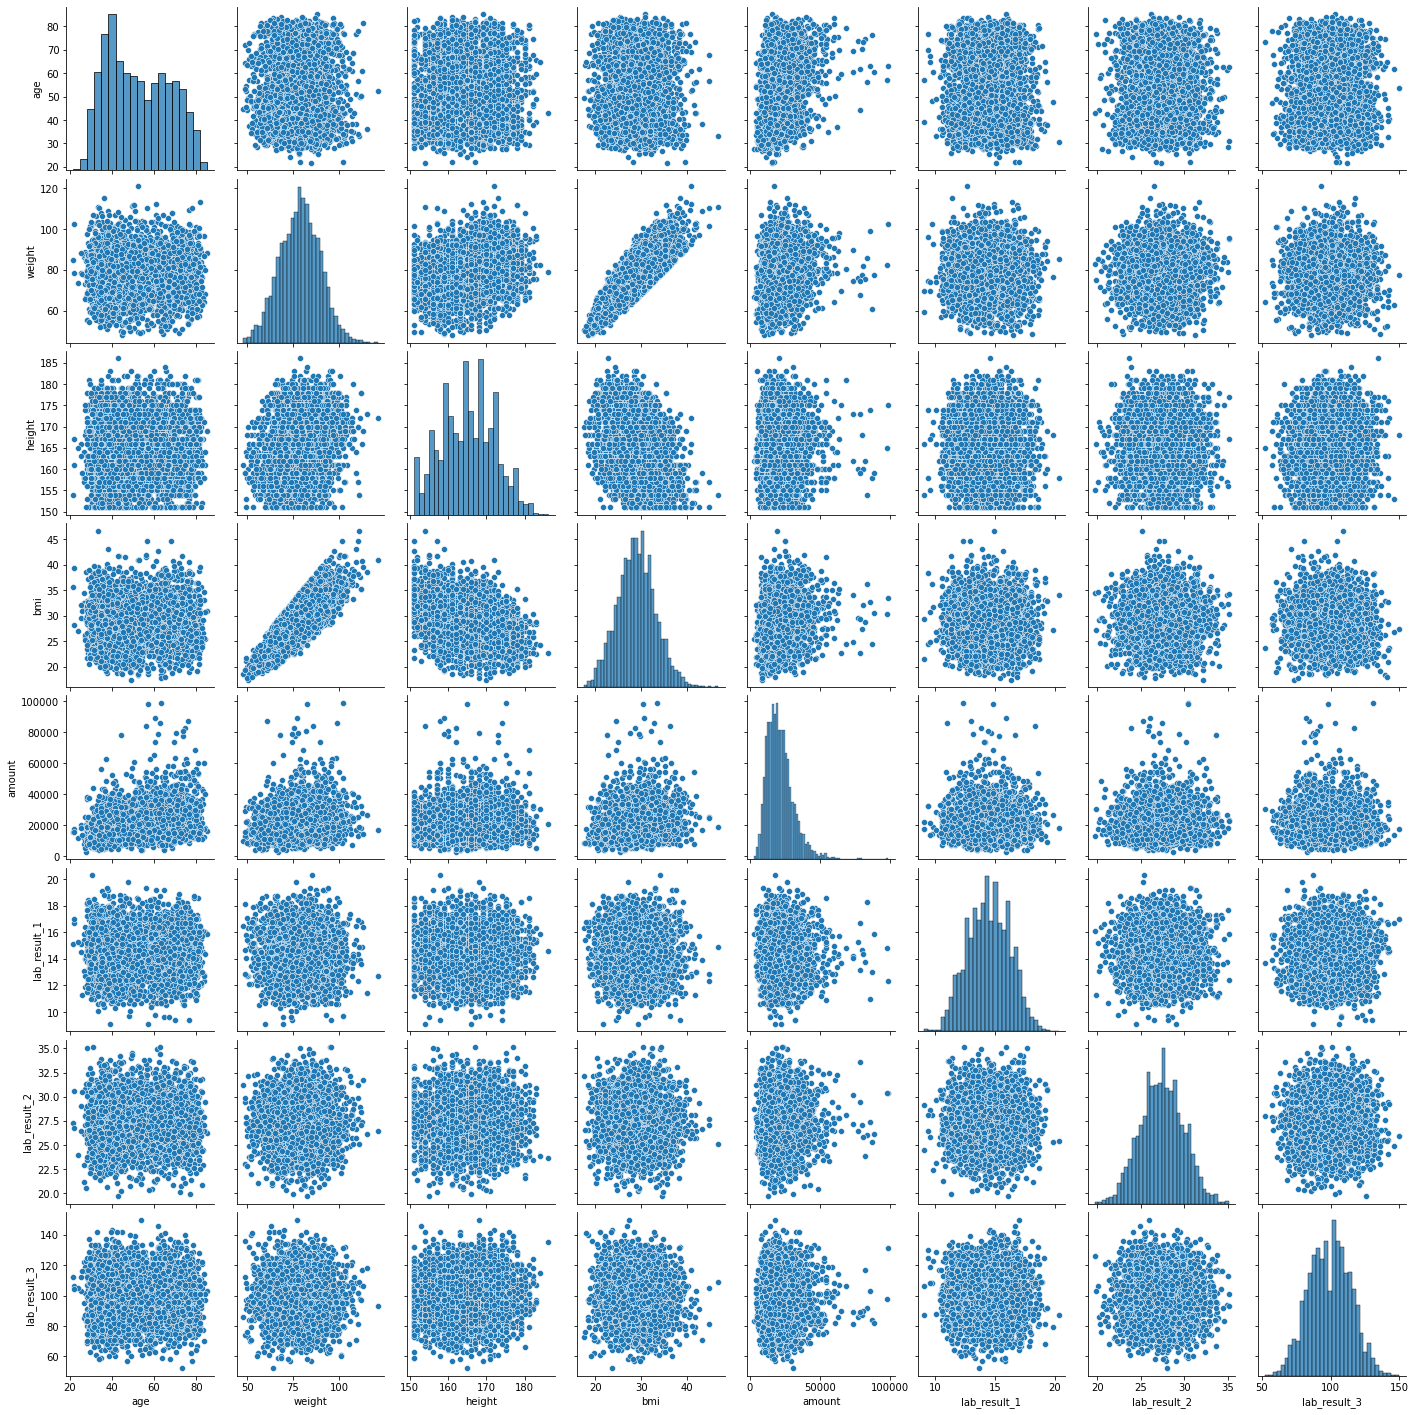

In [37]:
continous_cols = ['patient_id','gender','race','age','weight','height','bmi','resident_status',
                  'stay_duration','amount','lab_result_1','lab_result_2','lab_result_3']

continuous_df = master_df[continous_cols]

sns.pairplot(continuous_df)

<AxesSubplot:>

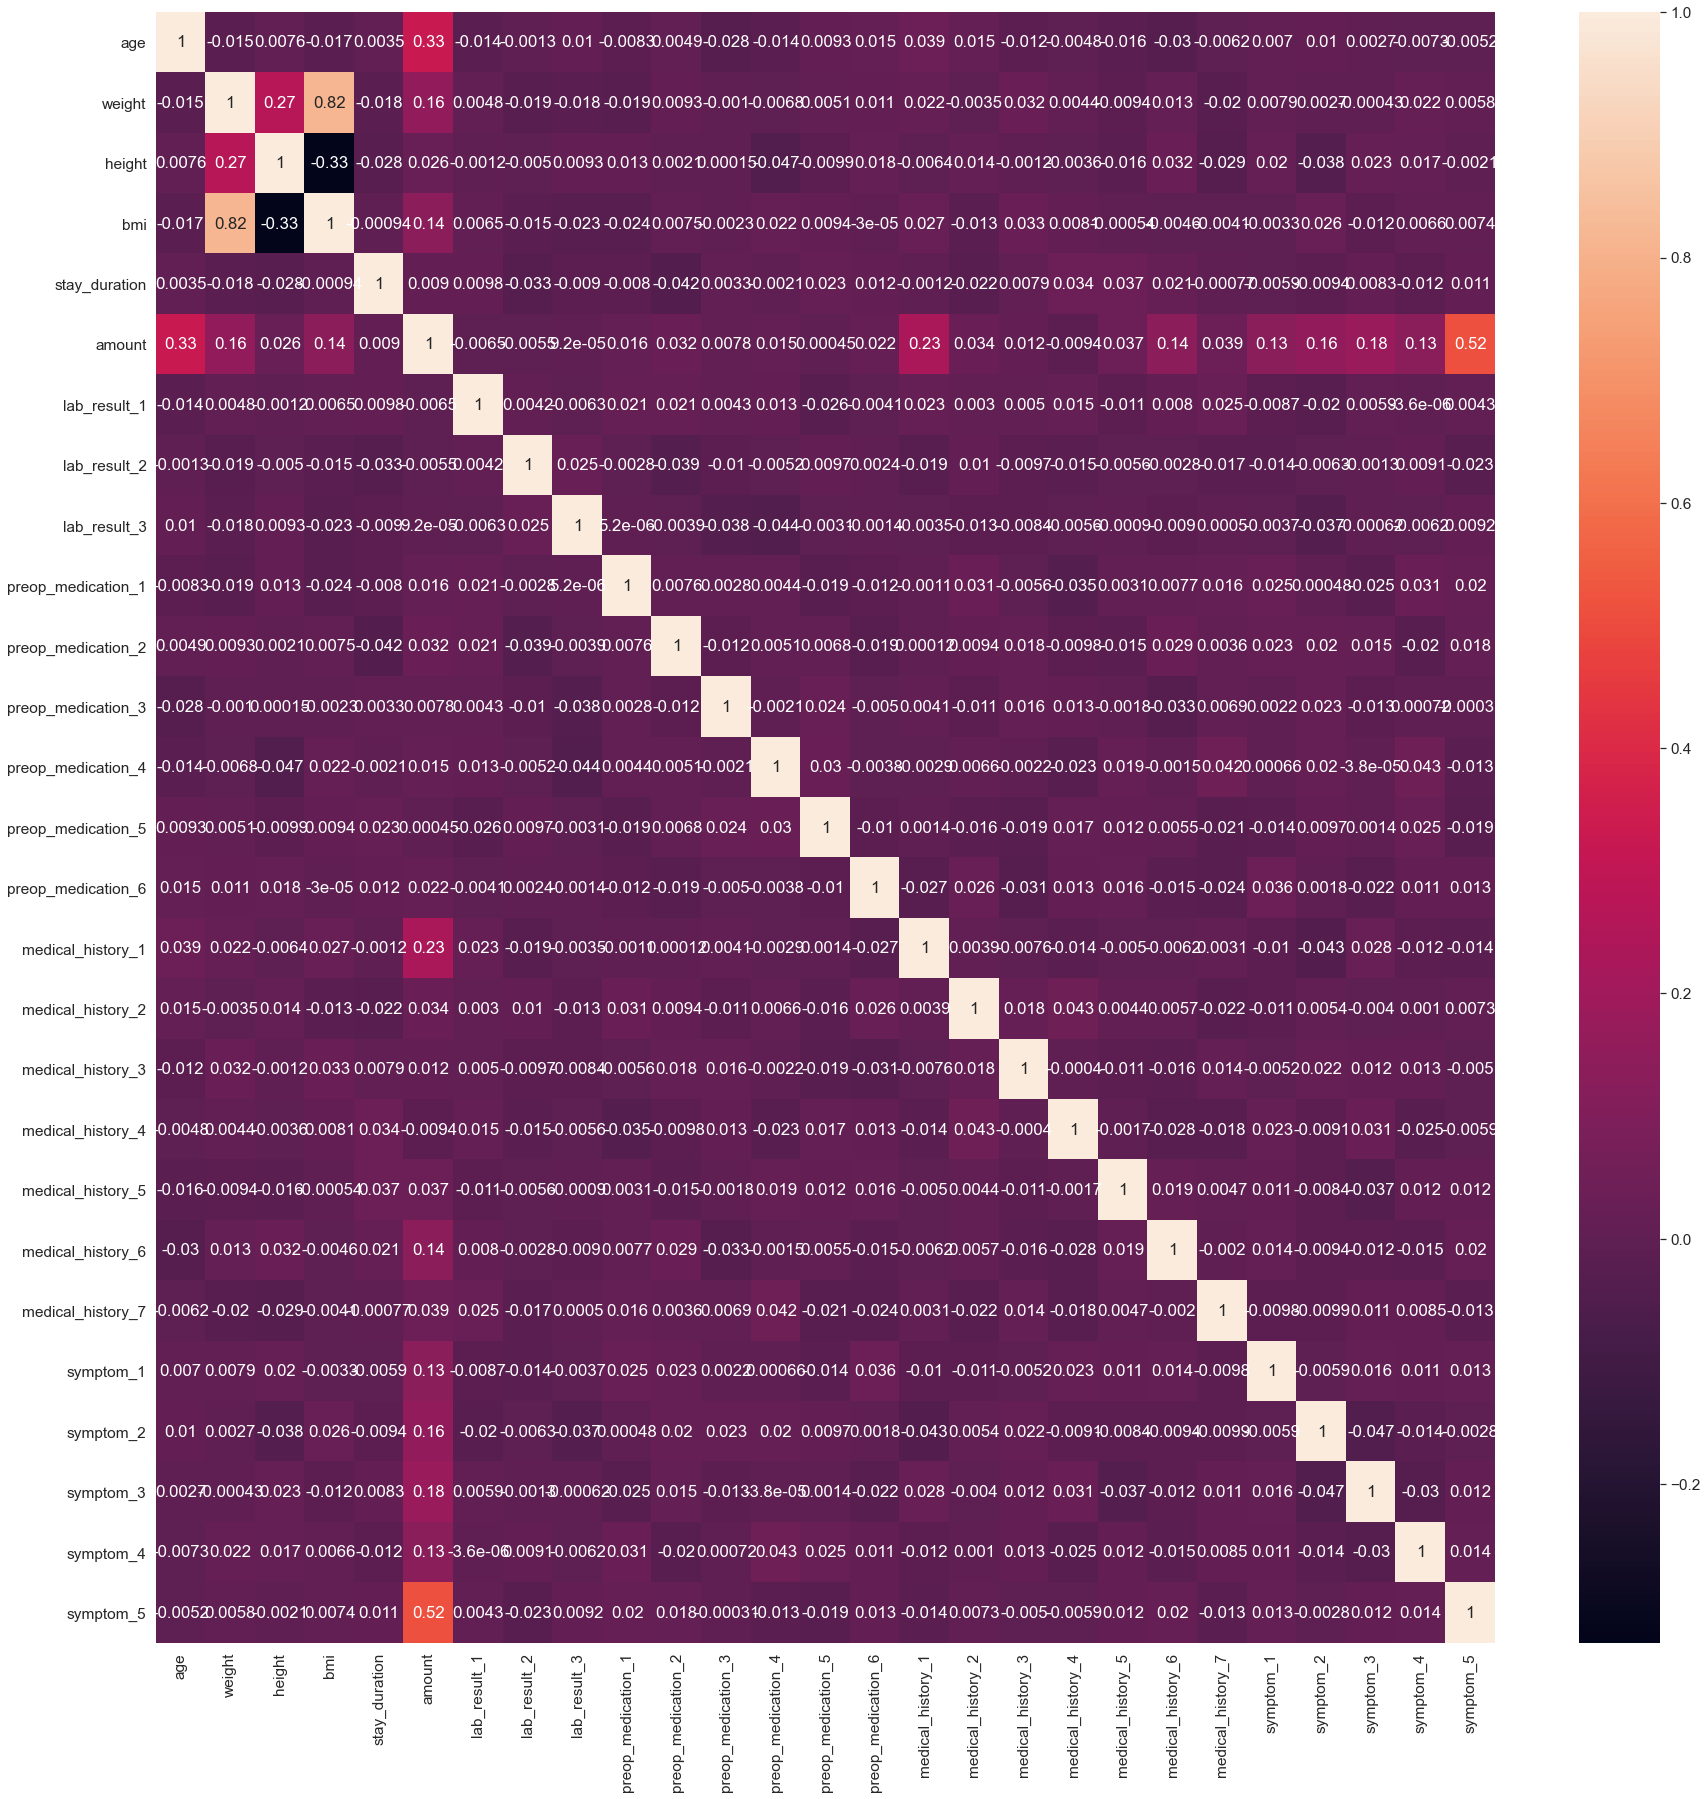

In [510]:
# Feature Correlation Heat Map

plt.figure(figsize=(30,30))
sns.set(font_scale=1.4)
sns.heatmap(master_df.corr(),color='b',annot=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'lab_result_1'}>,
        <AxesSubplot:title={'center':'lab_result_2'}>,
        <AxesSubplot:title={'center':'lab_result_3'}>,
        <AxesSubplot:title={'center':'preop_medication_1'}>,
        <AxesSubplot:title={'center':'preop_medication_2'}>],
       [<AxesSubplot:title={'center':'preop_medication_3'}>,
        <AxesSubplot:title={'center':'preop_medication_4'}>,
        <AxesSubplot:title={'center':'preop_medication_5'}>,
        <AxesSubplot:title={'center':'medical_history_1'}>,
        <AxesSubplot:title={'center':'medical_history_2'}>],
       [<AxesSubplot:title={'center':'medical_history_3'}>,
        <AxesSubplot:title={'center':'medical_history_4'}>,
        <AxesSubplot:title={'center':'medical_hi

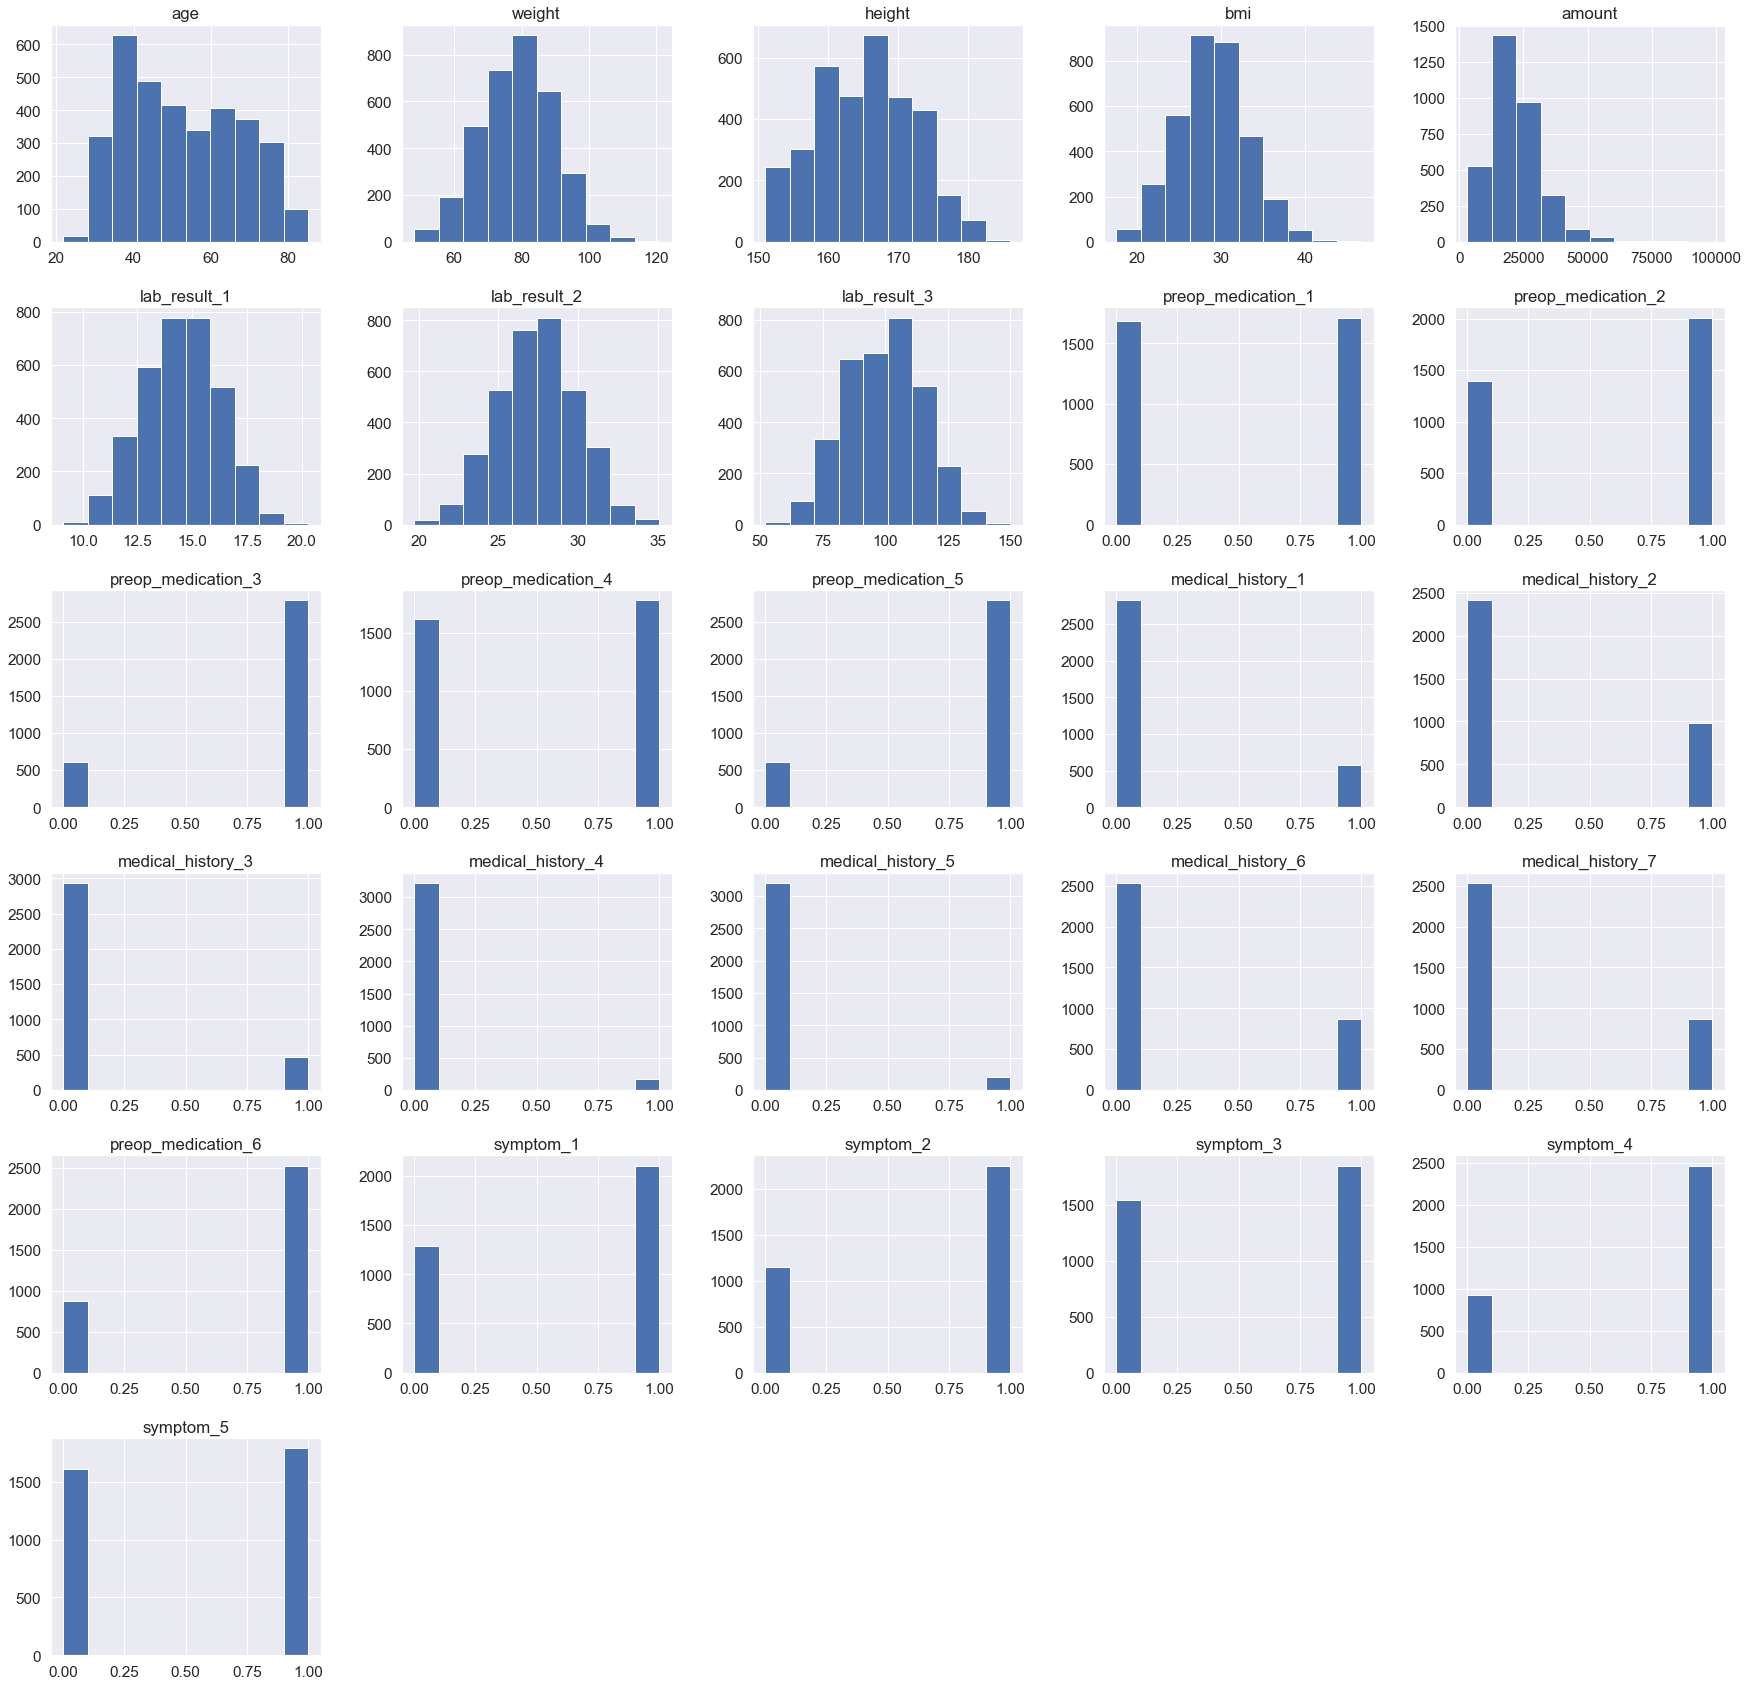

In [39]:
master_df.hist(figsize=(30,30))

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


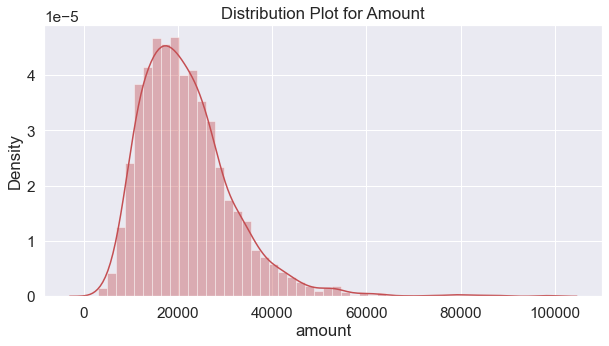

In [328]:
# Density plot for amount column

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.xlabel('Amount')
plt.ylabel('Density')
sns.distplot(master_df['amount'], color='r').set_title('Distribution Plot for Amount')
plt.show()

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


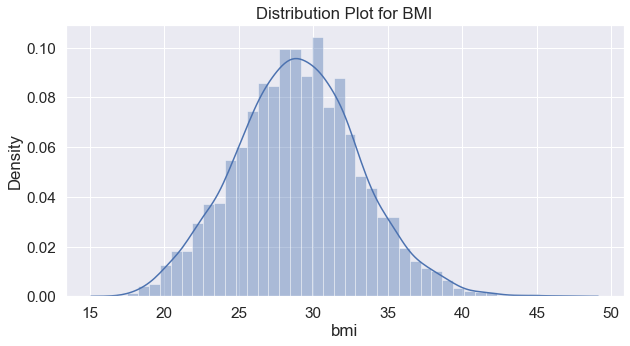

In [327]:
# Density plot for bmi column

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.xlabel('BMI')
plt.ylabel('Density')
sns.distplot(master_df['bmi']).set_title('Distribution Plot for BMI')
plt.show()

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


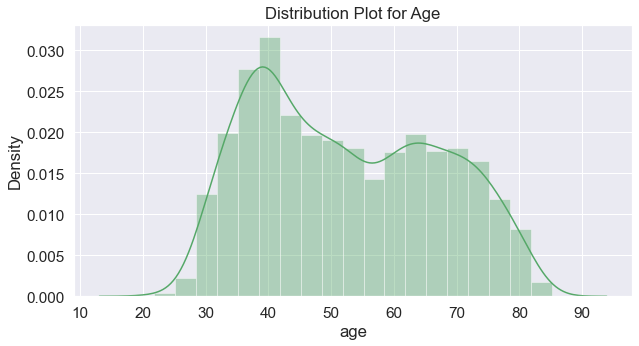

In [330]:
# Density plot for age column

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.xlabel('Age')
plt.ylabel('Density')
sns.distplot(master_df['age'], color='g').set_title('Distribution Plot for Age')
plt.show()

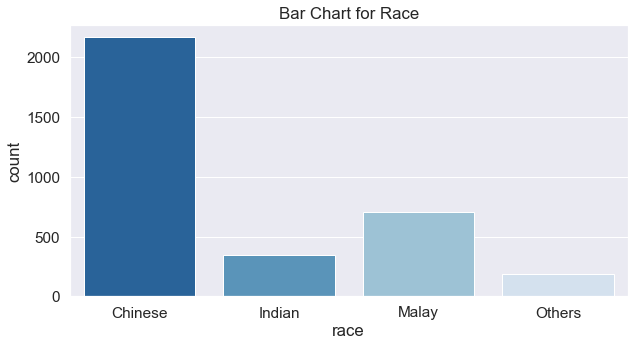

In [356]:
# Barchat for race column

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.xlabel('Age')
plt.ylabel('Density')
sequential_colors = sns.color_palette("Blues_r", 4)
sns.countplot(x='race', data=master_df, palette=sequential_colors).set_title('Bar Chart for Race')
plt.show()

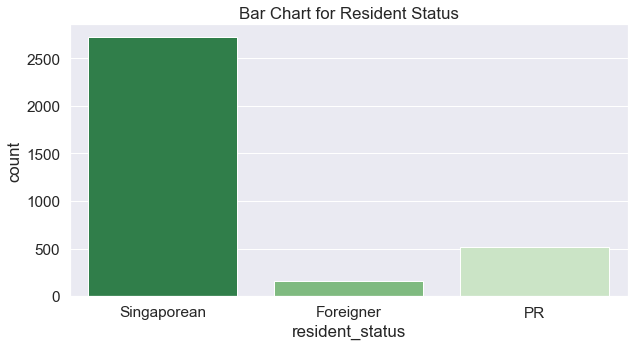

In [357]:
# Barchat for resident_status column

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.xlabel('Resident Status')
plt.ylabel('Density')
sequential_colors = sns.color_palette("Greens_r", 3)
sns.countplot(x='resident_status', data=master_df, palette=sequential_colors).set_title('Bar Chart for Resident Status')
plt.show()

## Demographic Data EDA

In [47]:
# Demographic data EDA

# gender, race, age, weight, height, bmi, resident status

demo_cols = ['gender', 'race', 'age', 'weight', 'height', 'bmi', 'resident_status','amount']

demographic_df = master_df[demo_cols]

demographic_df

gender     race        age  weight  height        bmi resident_status  \
0     Female  Chinese  31.231305    66.9   155.0  27.845994     Singaporean   
1     Female  Chinese  69.069180    89.1   160.0  34.804687     Singaporean   
2       Male   Indian  40.400556    79.5   172.0  26.872634     Singaporean   
3     Female  Chinese  37.553133    81.1   160.0  31.679687     Singaporean   
4       Male    Malay  69.526411    74.7   173.0  24.959070       Foreigner   
...      ...      ...        ...     ...     ...        ...             ...   
3395  Female   Indian  34.711185    69.3   162.0  26.406036     Singaporean   
3396    Male  Chinese  52.143439    99.6   178.0  31.435425     Singaporean   
3397    Male  Chinese  74.646297    83.1   170.0  28.754325              PR   
3398    Male    Malay  62.552961    81.3   161.0  31.364531     Singaporean   
3399  Female  Chinese  57.172974    70.7   165.0  25.968779     Singaporean   

            amount  
0      5190.566695  
1     22601.497872  
2     17447.181635  
3     15285.883220  
4     73477.869010  
...            ...  
3395   4676.066179  
3396  14049.042774  
3397  30053.620971  
3398  28007.636468  
3399  21040.661990  

[3400 rows x 8 columns]

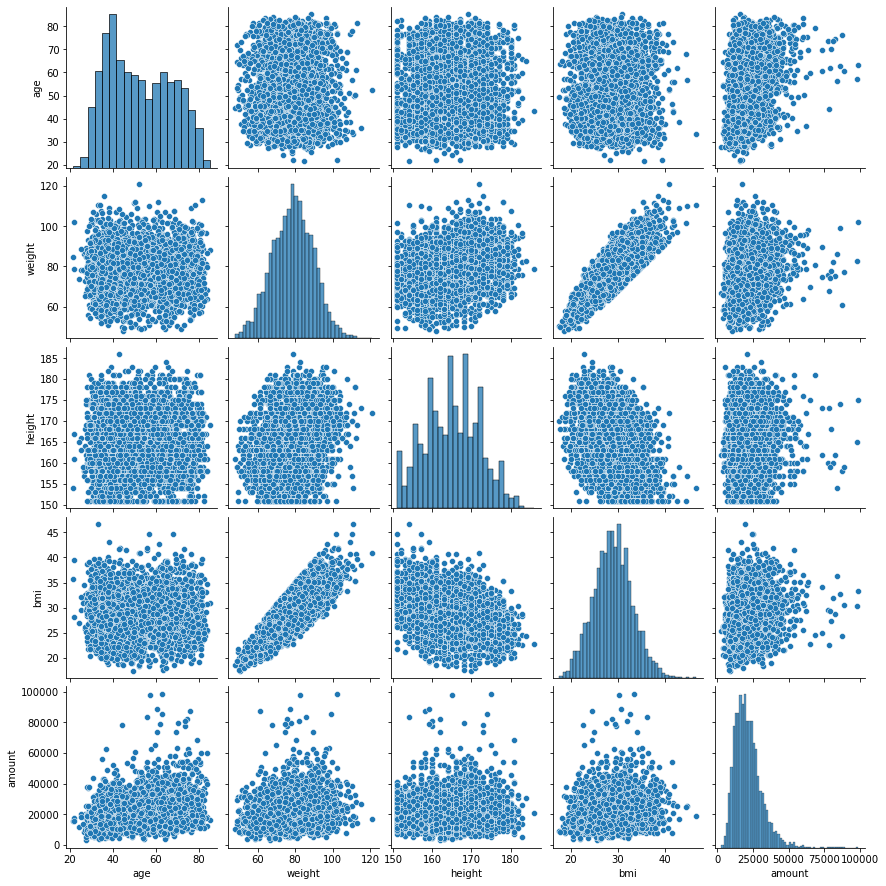

In [48]:
sns.pairplot(demographic_df)

<AxesSubplot:xlabel='gender', ylabel='amount'>

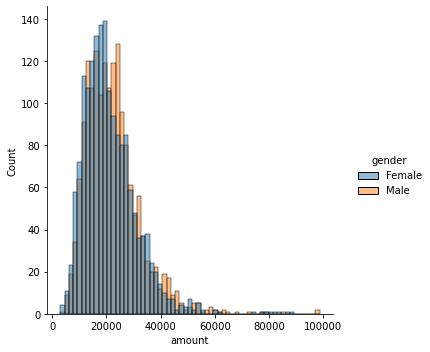

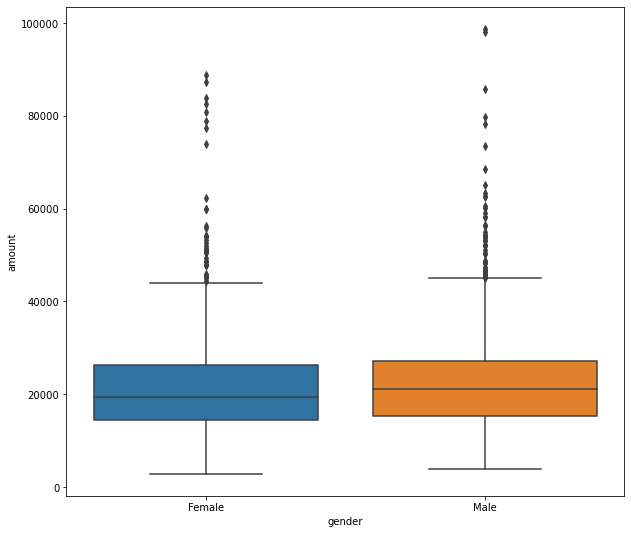

In [56]:
# Does gender affect amount?

sns.displot(demographic_df, x="amount", hue="gender")

plt.figure(figsize=(10,9))
sns.boxplot(x="gender", y="amount", data=demographic_df)

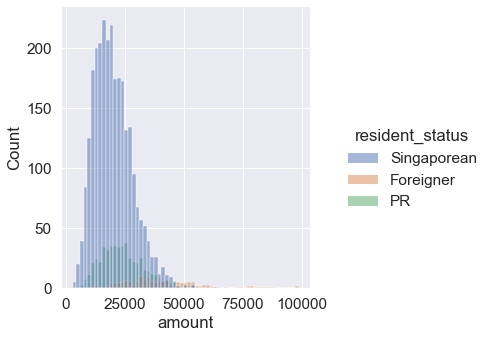

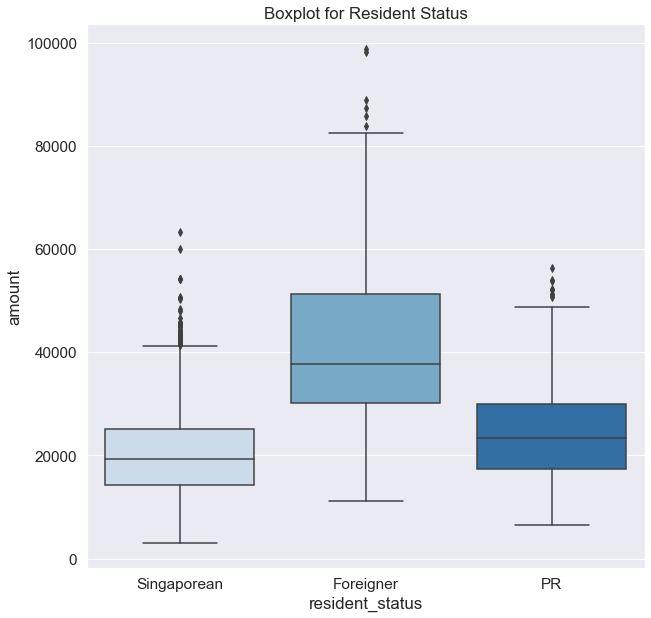

In [376]:
# Does resident status affect amount?

sns.displot(demographic_df, x="amount", hue="resident_status")

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sequential_colors = sns.color_palette("Blues", 3)
sns.boxplot(x="resident_status", y="amount", data=demographic_df, palette=sequential_colors).set_title('Boxplot for Resident Status')
plt.show()

In [502]:
# Mean of total costs by resident status

resident_status = ['Foreigner','Singaporean','PR']

for r in resident_status:
    s_df = demographic_df[demographic_df['resident_status'] == r]
    print('Mean Amount for {}s: ${}'.format(r, s_df['amount'].mean()))

Mean Amount for Foreigners: $41703.77523097328
Mean Amount for Singaporeans: $20211.436913665202
Mean Amount for PRs: $24370.058016084007


<Figure size 576x576 with 0 Axes>

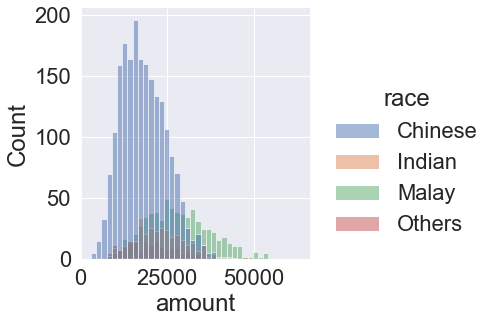

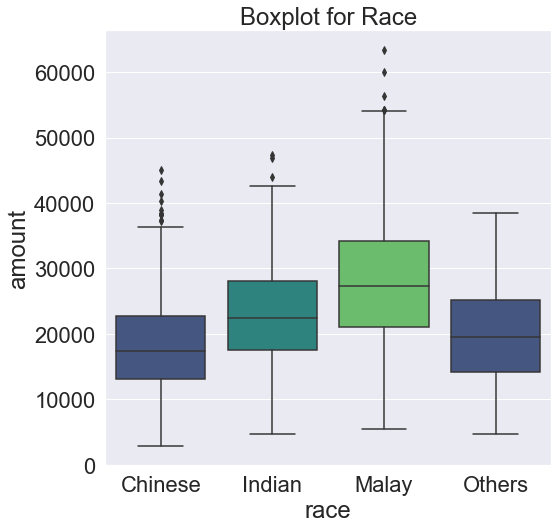

In [407]:
# Does race affect amount?

plt.figure(figsize=(8,8))
sns.displot(demographic_df2, x="amount", hue="race")

plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.set(font_scale = 2)
sequential_colors = sns.color_palette("viridis", 3)
sns.boxplot(x="race", y="amount", data=demographic_df2, palette=sequential_colors).set_title('Boxplot for Race')
plt.show()

In [505]:
# Mean of total costs by race

race_list = ['Chinese','Indian','Malay','Others']

for r in race_list:
    s_df = demographic_df2[demographic_df2['race'] == r]
    print('Mean Amount for {} Patients: ${}'.format(r, s_df['amount'].mean()))

Mean Amount for Chinese Patients: $18228.849014701605
Mean Amount for Indian Patients: $23039.39891330646
Mean Amount for Malay Patients: $28128.388872795746
Mean Amount for Others Patients: $19868.858620930234


In [225]:
# Remove Foreigners from dataset

master_df2 = master_df[master_df['resident_status'] != 'Foreigner']
master_df2

patient_id  gender     race        age  weight  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese  31.231305    66.9   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese  69.069180    89.1   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian  40.400556    79.5   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese  37.553133    81.1   
6     0092d20dd0719e88ecfdd02d5e7ca7b7    Male    Malay  65.342889    70.9   
...                                ...     ...      ...        ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese  52.143439    99.6   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese  74.646297    83.1   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay  62.552961    81.3   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese  57.172974    70.7   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
0      155.0  27.845994     Singaporean    1983-01-16        2014-04-10  ...   
1      160.0  34.804687     Singaporean    1943-10-14        2012-11-07  ...   
2      172.0  26.872634     Singaporean    1972-08-26        2013-01-19  ...   
3      160.0  31.679687     Singaporean    1976-07-23        2014-02-10  ...   
6      172.0  23.965657     Singaporean    1947-09-18        2013-01-20  ...   
...      ...        ...             ...           ...               ...  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
3396   178.0  31.435425     Singaporean    1963-10-07        2015-11-28  ...   
3397   170.0  28.754325              PR    1938-09-12        2013-05-05  ...   
3398   161.0  31.364531     Singaporean    1950-06-06        2012-12-24  ...   
3399   165.0  25.968779     Singaporean    1956-04-02        2013-06-04  ...   

     medical_history_3  medical_history_4  medical_history_5  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
6                    0                  0                  0   
...                ...                ...                ...   
3395                 0                  0                  0   
3396                 0                  0                  0   
3397                 0                  0                  1   
3398                 0                  0                  0   
3399                 0                  0                  0   

      medical_history_6  medical_history_7  symptom_1  symptom_2  symptom_3  \
0                     0                  1          0          0          1   
1                     1                  0          0          1          0   
2                     0                  1          0          1          0   
3                     0                  0          0          1          1   
6                     0                  0          1          1          1   
...                 ...                ...        ...        ...        ...   
3395                  0                  1          0          0          0   
3396                  0                  0          1          1          0   
3397                  0                  0          0          0          1   
3398                  0                  0          1          1          1   
3399                  0                  1          1          0          1   

      symptom_4  symptom_5  
0             0          0  
1             0          1  
2             0          1  
3             1          0  
6             0          0  
...         ...        ...  
3395          0          0  
3396          1          0  
3397          1          1  
3398          1          0  
3399          1          1  

[3239 rows x 34 columns]

Text(0.5, 1.0, 'Heat Map of Categorical Demographic Variables')

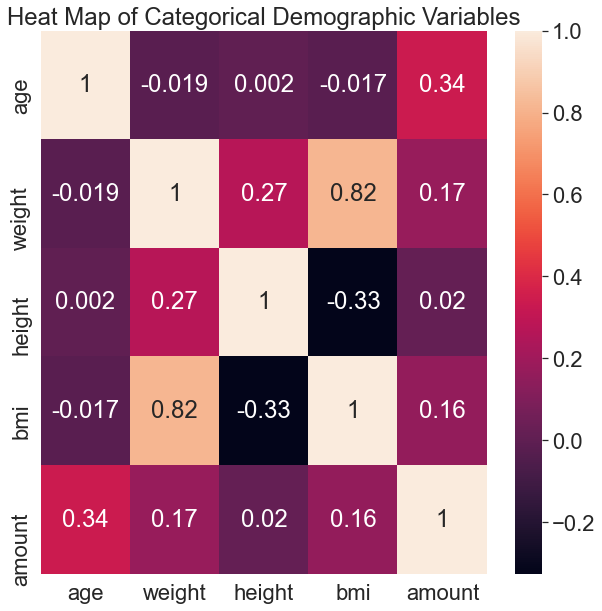

In [402]:
# Correlation Heat Map of demographic variables

demo_cols = ['gender', 'race', 'age', 'weight', 'height', 'bmi', 'resident_status','amount']
demographic_df2 = master_df2[demo_cols]

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(demographic_df2.corr(),color='b',annot=True).set_title('Heat Map of Categorical Demographic Variables')

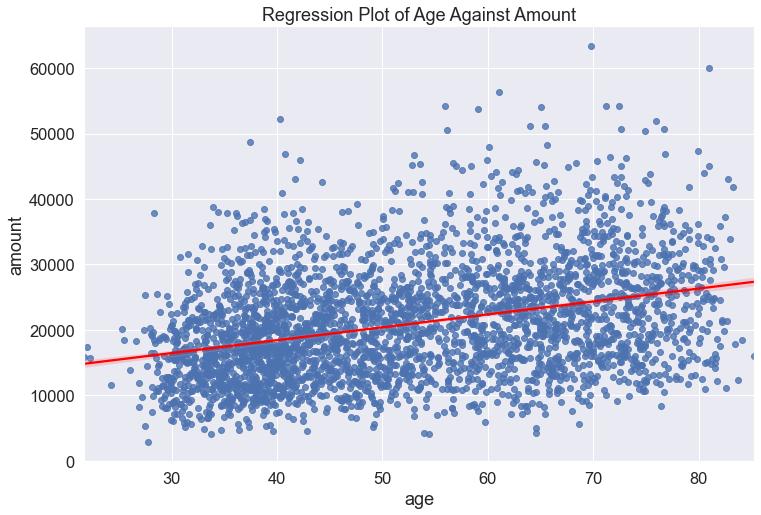

In [393]:
# Does age affect amount?

#sns.set_theme(color_codes=True)
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sns.regplot(x='age',y='amount',data=master_df2, line_kws={'color': 'red'}).set_title('Regression Plot of Age Against Amount')
plt.show()

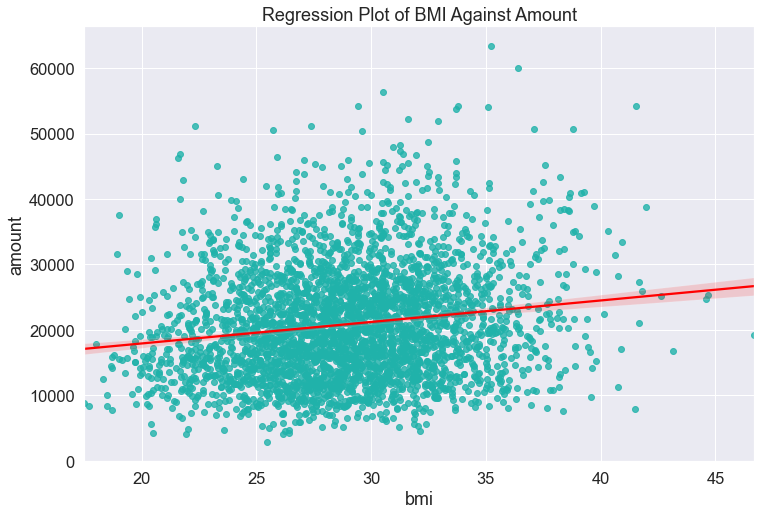

In [400]:
# Does BMI affect amount?

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sns.regplot(x='bmi',y='amount',data=master_df2, line_kws={'color': 'red'}, scatter_kws={'color':'lightseagreen'}).set_title('Regression Plot of BMI Against Amount')
plt.show()

## Clinical Data EDA

Text(0.5, 1.0, 'Heat Map of Selected Clinical Variables')

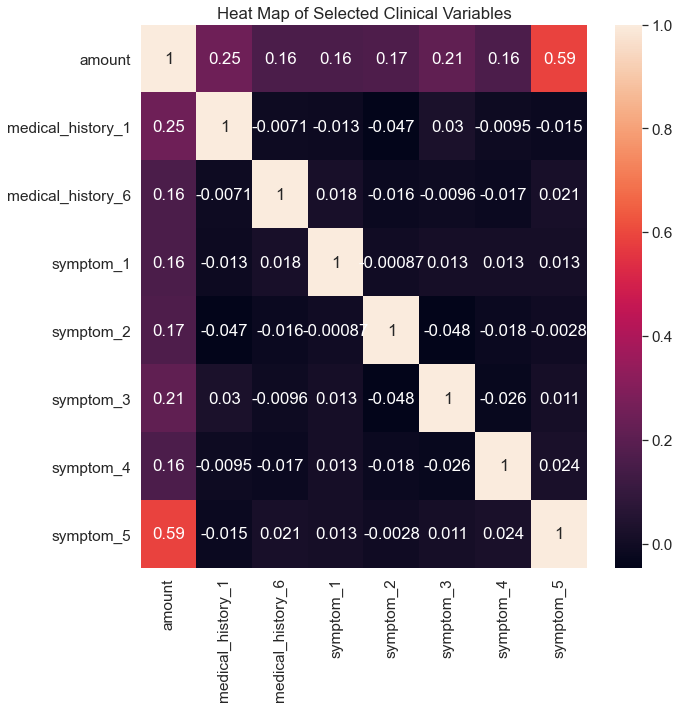

In [426]:
# Correlation Heat Map of clinical data with amount

corr_variables = ['amount','medical_history_1','medical_history_6','symptom_1','symptom_2','symptom_3','symptom_4','symptom_5']
clinic_df = master_df2[corr_variables]

plt.figure(figsize=(10,10))
sns.set(font_scale=1.4)
sns.heatmap(clinic_df.corr(),color='b',annot=True).set_title('Heat Map of Selected Clinical Variables')

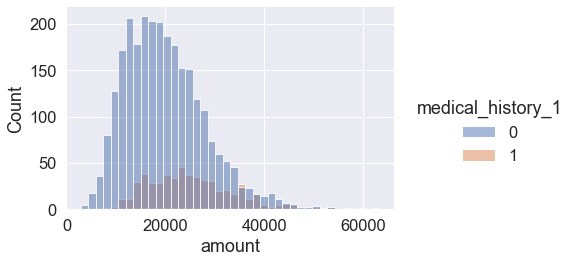

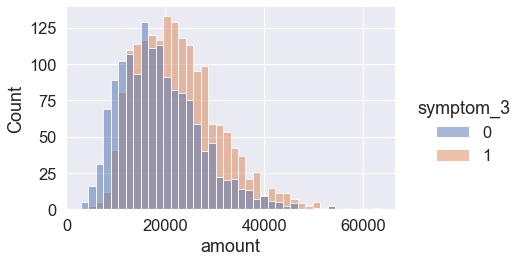

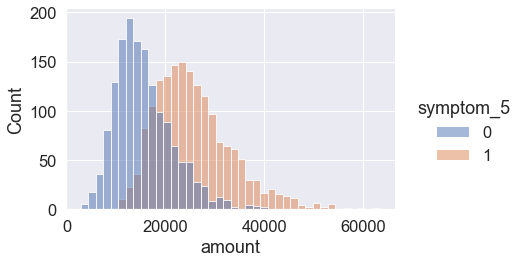

In [454]:
# Distribution Plot of selected clinical features

corr_variables = ['medical_history_1','symptom_3','symptom_5']

for corr in corr_variables:
    sns.displot(master_df2, x='amount', hue=corr, height=4, aspect=1.5)

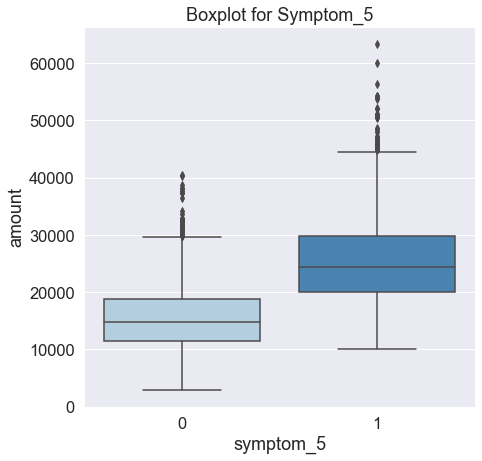

In [432]:
# Boxplot for Symptom_5

plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sequential_colors = sns.color_palette("Blues", 2)
sns.boxplot(x="symptom_5", y="amount", data=master_df2, palette=sequential_colors).set_title('Boxplot for Symptom_5')
plt.show()

In [152]:
pd.crosstab(master_df2['race'],master_df2['symptom_5'])

symptom_5    0     1
race                
Chinese    989  1071
Indian     135   195
Malay      326   350
Others      86    87

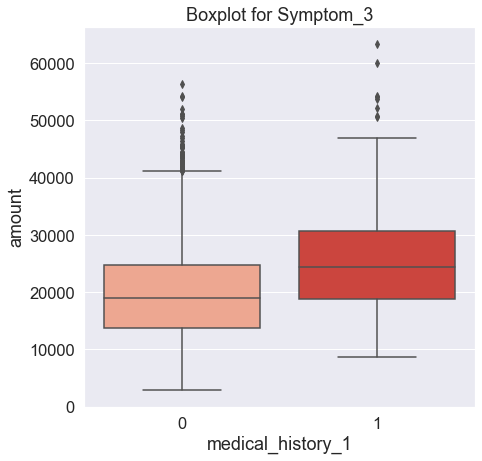

In [438]:
# Boxplot for Symptom_3

plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sequential_colors = sns.color_palette("Reds", 2)
sns.boxplot(x="medical_history_1", y="amount", data=master_df2, palette=sequential_colors).set_title('Boxplot for Symptom_3')
plt.show()

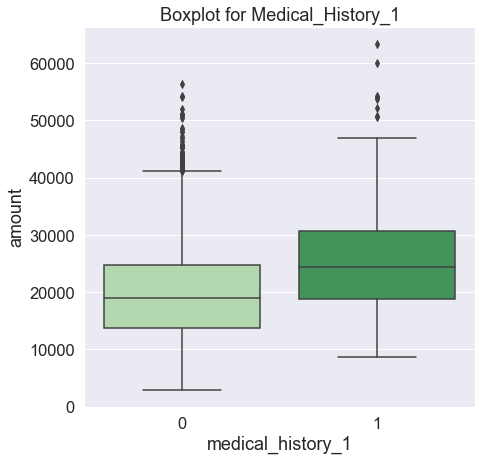

In [434]:
# Boxplot for Medical_History_1

plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sequential_colors = sns.color_palette("Greens", 2)
sns.boxplot(x="medical_history_1", y="amount", data=master_df2, palette=sequential_colors).set_title('Boxplot for Medical_History_1')
plt.show()

In [154]:
# Does the number of symptoms present in a patient increase the total amount spent?

## Create Number of symptoms column 

symptom_df = master_df2.copy()
symptom_df['symptoms_count'] = symptom_df.iloc[:,-6:-1].sum(axis=1)

symptom_df

patient_id  gender     race        age  weight  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese  31.231305    66.9   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese  69.069180    89.1   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian  40.400556    79.5   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese  37.553133    81.1   
6     0092d20dd0719e88ecfdd02d5e7ca7b7    Male    Malay  65.342889    70.9   
...                                ...     ...      ...        ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese  52.143439    99.6   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese  74.646297    83.1   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay  62.552961    81.3   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese  57.172974    70.7   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
0      155.0  27.845994     Singaporean    1983-01-16        2014-04-10  ...   
1      160.0  34.804687     Singaporean    1943-10-14        2012-11-07  ...   
2      172.0  26.872634     Singaporean    1972-08-26        2013-01-19  ...   
3      160.0  31.679687     Singaporean    1976-07-23        2014-02-10  ...   
6      172.0  23.965657     Singaporean    1947-09-18        2013-01-20  ...   
...      ...        ...             ...           ...               ...  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
3396   178.0  31.435425     Singaporean    1963-10-07        2015-11-28  ...   
3397   170.0  28.754325              PR    1938-09-12        2013-05-05  ...   
3398   161.0  31.364531     Singaporean    1950-06-06        2012-12-24  ...   
3399   165.0  25.968779     Singaporean    1956-04-02        2013-06-04  ...   

     medical_history_4 medical_history_5  medical_history_6  \
0                    0                 0                  0   
1                    0                 0                  1   
2                    0                 0                  0   
3                    0                 0                  0   
6                    0                 0                  0   
...                ...               ...                ...   
3395                 0                 0                  0   
3396                 0                 0                  0   
3397                 0                 1                  0   
3398                 0                 0                  0   
3399                 0                 0                  0   

      medical_history_7  symptom_1  symptom_2  symptom_3  symptom_4  \
0                     1          0          0          1          0   
1                     0          0          1          0          0   
2                     1          0          1          0          0   
3                     0          0          1          1          1   
6                     0          1          1          1          0   
...                 ...        ...        ...        ...        ...   
3395                  1          0          0          0          0   
3396                  0          1          1          0          1   
3397                  0          0          0          1          1   
3398                  0          1          1          1          1   
3399                  1          1          0          1          1   

      symptom_5  symptoms_count  
0             0               2  
1             1               1  
2             1               2  
3             0               3  
6             0               3  
...         ...             ...  
3395          0               1  
3396          0               3  
3397          1               2  
3398          0               4  
3399          1               4  

[3239 rows x 35 columns]

Text(0.5, 1.0, 'Boxplot for Symptoms Count')

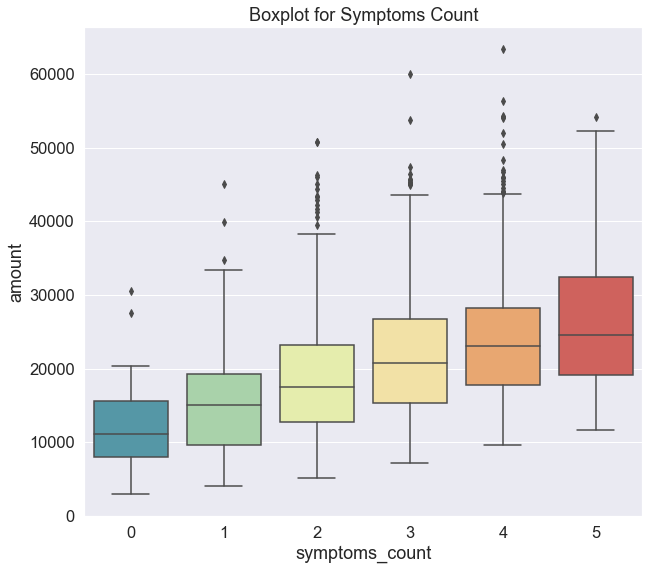

In [461]:
# Does the number of symptoms present in a patient increase the total amount spent?

plt.figure(figsize=(10,9))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sequential_colors = sns.color_palette("Spectral_r", 6)
sns.boxplot(x="symptoms_count", y="amount", data=symptom_df, palette=sequential_colors).set_title('Boxplot for Symptoms Count')

<Figure size 504x864 with 0 Axes>

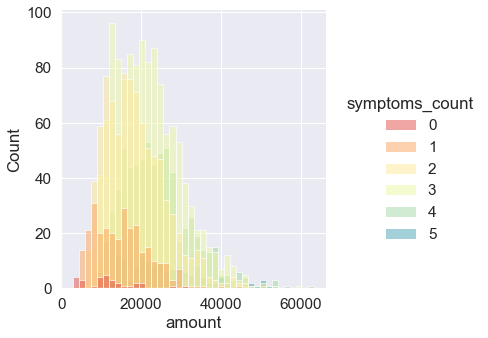

In [421]:
plt.figure(figsize=(7,12))
colour = sns.color_palette("Spectral", 6)
sns.displot(symptom_df, x="amount", hue="symptoms_count", palette=colour)

In [157]:
# What about medical_history and preop_medication?

## Create Number of medical history column 

med_hist_df = master_df2.copy()
med_hist_df['history_count'] = med_hist_df.iloc[:,-13:-6].sum(axis=1)

med_hist_df

patient_id  gender     race        age  weight  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese  31.231305    66.9   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese  69.069180    89.1   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian  40.400556    79.5   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese  37.553133    81.1   
6     0092d20dd0719e88ecfdd02d5e7ca7b7    Male    Malay  65.342889    70.9   
...                                ...     ...      ...        ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese  52.143439    99.6   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese  74.646297    83.1   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay  62.552961    81.3   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese  57.172974    70.7   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
0      155.0  27.845994     Singaporean    1983-01-16        2014-04-10  ...   
1      160.0  34.804687     Singaporean    1943-10-14        2012-11-07  ...   
2      172.0  26.872634     Singaporean    1972-08-26        2013-01-19  ...   
3      160.0  31.679687     Singaporean    1976-07-23        2014-02-10  ...   
6      172.0  23.965657     Singaporean    1947-09-18        2013-01-20  ...   
...      ...        ...             ...           ...               ...  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
3396   178.0  31.435425     Singaporean    1963-10-07        2015-11-28  ...   
3397   170.0  28.754325              PR    1938-09-12        2013-05-05  ...   
3398   161.0  31.364531     Singaporean    1950-06-06        2012-12-24  ...   
3399   165.0  25.968779     Singaporean    1956-04-02        2013-06-04  ...   

     medical_history_4 medical_history_5  medical_history_6  \
0                    0                 0                  0   
1                    0                 0                  1   
2                    0                 0                  0   
3                    0                 0                  0   
6                    0                 0                  0   
...                ...               ...                ...   
3395                 0                 0                  0   
3396                 0                 0                  0   
3397                 0                 1                  0   
3398                 0                 0                  0   
3399                 0                 0                  0   

      medical_history_7  symptom_1  symptom_2  symptom_3  symptom_4  \
0                     1          0          0          1          0   
1                     0          0          1          0          0   
2                     1          0          1          0          0   
3                     0          0          1          1          1   
6                     0          1          1          1          0   
...                 ...        ...        ...        ...        ...   
3395                  1          0          0          0          0   
3396                  0          1          1          0          1   
3397                  0          0          0          1          1   
3398                  0          1          1          1          1   
3399                  1          1          0          1          1   

      symptom_5  history_count  
0             0              0  
1             1              2  
2             1              1  
3             0              1  
6             0              1  
...         ...            ...  
3395          0              1  
3396          0              1  
3397          1              3  
3398          0              0  
3399          1              1  

[3239 rows x 35 columns]

Text(0.5, 1.0, 'Boxplot for Medical History Count')

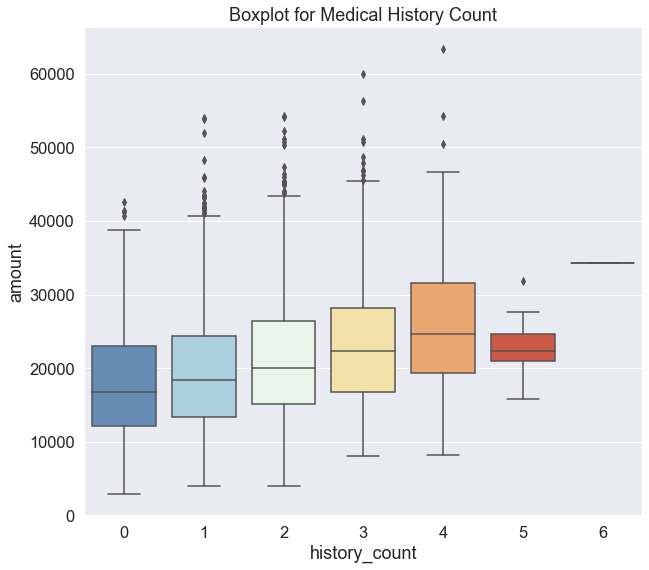

In [463]:
# What about medical_history and preop_medication?

plt.figure(figsize=(10,9))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sequential_colors = sns.color_palette("RdYlBu_r", 6)
sns.boxplot(x="history_count", y="amount", data=med_hist_df, palette=sequential_colors).set_title('Boxplot for Medical History Count')


In [159]:
# What about preop_medication?

## Create Number of pre-op medication column 

preop_med_df = master_df2.copy()
preop_med_df['preop_med_count'] = preop_med_df.iloc[:,-18:-12].sum(axis=1)

preop_med_df

patient_id  gender     race        age  weight  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese  31.231305    66.9   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese  69.069180    89.1   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian  40.400556    79.5   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese  37.553133    81.1   
6     0092d20dd0719e88ecfdd02d5e7ca7b7    Male    Malay  65.342889    70.9   
...                                ...     ...      ...        ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese  52.143439    99.6   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese  74.646297    83.1   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay  62.552961    81.3   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese  57.172974    70.7   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
0      155.0  27.845994     Singaporean    1983-01-16        2014-04-10  ...   
1      160.0  34.804687     Singaporean    1943-10-14        2012-11-07  ...   
2      172.0  26.872634     Singaporean    1972-08-26        2013-01-19  ...   
3      160.0  31.679687     Singaporean    1976-07-23        2014-02-10  ...   
6      172.0  23.965657     Singaporean    1947-09-18        2013-01-20  ...   
...      ...        ...             ...           ...               ...  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
3396   178.0  31.435425     Singaporean    1963-10-07        2015-11-28  ...   
3397   170.0  28.754325              PR    1938-09-12        2013-05-05  ...   
3398   161.0  31.364531     Singaporean    1950-06-06        2012-12-24  ...   
3399   165.0  25.968779     Singaporean    1956-04-02        2013-06-04  ...   

     medical_history_4 medical_history_5  medical_history_6  \
0                    0                 0                  0   
1                    0                 0                  1   
2                    0                 0                  0   
3                    0                 0                  0   
6                    0                 0                  0   
...                ...               ...                ...   
3395                 0                 0                  0   
3396                 0                 0                  0   
3397                 0                 1                  0   
3398                 0                 0                  0   
3399                 0                 0                  0   

      medical_history_7  symptom_1  symptom_2  symptom_3  symptom_4  \
0                     1          0          0          1          0   
1                     0          0          1          0          0   
2                     1          0          1          0          0   
3                     0          0          1          1          1   
6                     0          1          1          1          0   
...                 ...        ...        ...        ...        ...   
3395                  1          0          0          0          0   
3396                  0          1          1          0          1   
3397                  0          0          0          1          1   
3398                  0          1          1          1          1   
3399                  1          1          0          1          1   

      symptom_5  preop_med_count  
0             0                1  
1             1                1  
2             1                3  
3             0                3  
6             0                4  
...         ...              ...  
3395          0                2  
3396          0                6  
3397          1                6  
3398          0                5  
3399          1                4  

[3239 rows x 35 columns]

<AxesSubplot:xlabel='preop_med_count', ylabel='amount'>

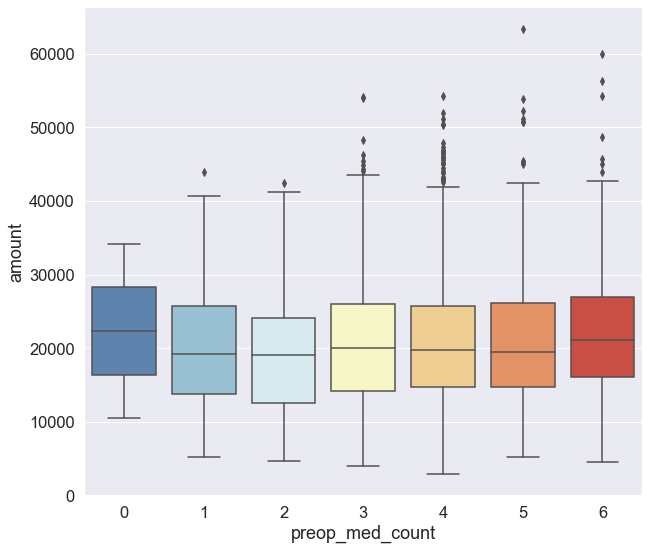

In [465]:
# What about preop_medication?

plt.figure(figsize=(10,9))
sequential_colors = sns.color_palette("RdYlBu_r", 7)
sns.boxplot(x="preop_med_count", y="amount", data=preop_med_df, palette=sequential_colors)

In [161]:
# Lab results

lab_df = master_df2.iloc[:,13:16]
lab_df

# Normalize lab result values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
lab_scaled = scaler.fit_transform(lab_df)
lab_scaled_df = pd.DataFrame(lab_scaled, columns=['lab_results_1','lab_results_2','lab_results_3'])
lab_scaled_df = pd.concat([master_df['amount'], lab_scaled_df], axis=1, join='outer')

lab_scaled_df

# Convert lab_scaled_df from wide to long form 
lab_scaled_df_long = lab_scaled_df.melt('amount', var_name='cols', value_name='vals')
lab_scaled_df_long

amount           cols      vals
0       5190.566695  lab_results_1  0.383929
1      22601.497872  lab_results_1  0.678571
2      17447.181635  lab_results_1  0.508929
3      15285.883220  lab_results_1  0.517857
4      73477.869010  lab_results_1  0.464286
...             ...            ...       ...
10195   4676.066179  lab_results_3       NaN
10196  14049.042774  lab_results_3       NaN
10197  30053.620971  lab_results_3       NaN
10198  28007.636468  lab_results_3       NaN
10199  21040.661990  lab_results_3       NaN

[10200 rows x 3 columns]

<AxesSubplot:xlabel='vals', ylabel='amount'>

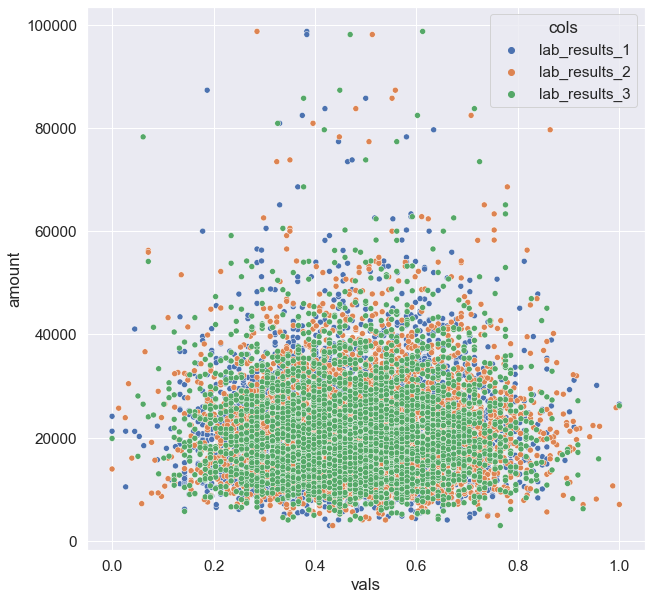

In [162]:
# Plot scatterplot of lab results to amount

plt.figure(figsize=(10,10))
sns.scatterplot(data=lab_scaled_df_long, x='vals', y='amount', hue='cols')

## Repeat Patients

In [163]:
# Does being a repeat patient increase the cost of treatment for subsequent visits?

# Filter for single visit patients
single_df = master_df2.drop_duplicates(subset=['patient_id'], keep=False)
single_df

patient_id  gender     race        age  weight  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese  31.231305    66.9   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese  69.069180    89.1   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian  40.400556    79.5   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese  37.553133    81.1   
6     0092d20dd0719e88ecfdd02d5e7ca7b7    Male    Malay  65.342889    70.9   
...                                ...     ...      ...        ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese  52.143439    99.6   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese  74.646297    83.1   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay  62.552961    81.3   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese  57.172974    70.7   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
0      155.0  27.845994     Singaporean    1983-01-16        2014-04-10  ...   
1      160.0  34.804687     Singaporean    1943-10-14        2012-11-07  ...   
2      172.0  26.872634     Singaporean    1972-08-26        2013-01-19  ...   
3      160.0  31.679687     Singaporean    1976-07-23        2014-02-10  ...   
6      172.0  23.965657     Singaporean    1947-09-18        2013-01-20  ...   
...      ...        ...             ...           ...               ...  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
3396   178.0  31.435425     Singaporean    1963-10-07        2015-11-28  ...   
3397   170.0  28.754325              PR    1938-09-12        2013-05-05  ...   
3398   161.0  31.364531     Singaporean    1950-06-06        2012-12-24  ...   
3399   165.0  25.968779     Singaporean    1956-04-02        2013-06-04  ...   

     medical_history_3 medical_history_4  medical_history_5  \
0                    0                 0                  0   
1                    0                 0                  0   
2                    0                 0                  0   
3                    0                 0                  0   
6                    0                 0                  0   
...                ...               ...                ...   
3395                 0                 0                  0   
3396                 0                 0                  0   
3397                 0                 0                  1   
3398                 0                 0                  0   
3399                 0                 0                  0   

      medical_history_6  medical_history_7  symptom_1  symptom_2  symptom_3  \
0                     0                  1          0          0          1   
1                     1                  0          0          1          0   
2                     0                  1          0          1          0   
3                     0                  0          0          1          1   
6                     0                  0          1          1          1   
...                 ...                ...        ...        ...        ...   
3395                  0                  1          0          0          0   
3396                  0                  0          1          1          0   
3397                  0                  0          0          0          1   
3398                  0                  0          1          1          1   
3399                  0                  1          1          0          1   

      symptom_4  symptom_5  
0             0          0  
1             0          1  
2             0          1  
3             1          0  
6             0          0  
...         ...        ...  
3395          0          0  
3396          1          0  
3397          1          1  
3398          1          0  
3399          1          1  

[2496 rows x 34 columns]

In [189]:
# Filter for repeat visit patients

single_list = single_df['patient_id'].to_list()
repeat_df = master_df2[~master_df2['patient_id'].isin(single_list)]

# Include date rank column to remove first visit of each patient
repeat_df['visit_number'] = repeat_df.groupby('patient_id')['date_of_admission'].rank(method='dense', ascending=True)

repeat_df

<ipython-input-189-3cdb5aa0adf7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_df['visit_number'] = repeat_df.groupby('patient_id')['date_of_admission'].rank(method='dense', ascending=True)


patient_id  gender     race        age  weight  \
11    012c5eb5397a72f8aeb64f942b60846d    Male    Malay  32.208738    99.2   
12    012c5eb5397a72f8aeb64f942b60846d    Male    Malay  36.652361    96.2   
30    0284ec8aa1e6ced9ddaa7702b841248d  Female   Indian  68.379227    65.1   
31    0284ec8aa1e6ced9ddaa7702b841248d  Female   Indian  68.694087    67.1   
46    03d6bdbc614a5bdbeadf5b981a59c423  Female  Chinese  72.965222    85.5   
...                                ...     ...      ...        ...     ...   
3382  feb52392f4d58a02254cbd0ba634312f  Female    Malay  35.015093    83.0   
3389  ff6de9534e28ea31f928ac79c399ecd6  Female  Chinese  36.896035    70.0   
3390  ff6de9534e28ea31f928ac79c399ecd6  Female  Chinese  38.629130    66.0   
3393  ff7a523f1dbd0385e731b4185cf64683  Female  Chinese  51.927144    79.6   
3394  ff7a523f1dbd0385e731b4185cf64683  Female  Chinese  52.274858    83.6   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
11     171.0  33.924968     Singaporean    1979-03-24        2011-06-08  ...   
12     171.0  32.899012     Singaporean    1979-03-24        2015-11-17  ...   
30     162.0  24.805670     Singaporean    1945-10-11        2014-02-26  ...   
31     162.0  25.567749     Singaporean    1945-10-11        2014-06-21  ...   
46     159.0  33.819865     Singaporean    1938-02-14        2011-02-01  ...   
...      ...        ...             ...           ...               ...  ...   
3382   166.0  30.120482     Singaporean    1979-04-14        2014-04-19  ...   
3389   157.0  28.398718     Singaporean    1974-02-20        2011-01-13  ...   
3390   157.0  26.775934     Singaporean    1974-02-20        2012-10-07  ...   
3393   161.0  30.708692     Singaporean    1962-12-06        2014-11-09  ...   
3394   161.0  32.251842     Singaporean    1962-12-06        2015-03-16  ...   

     medical_history_4 medical_history_5  medical_history_6  \
11                   0                 0                  1   
12                   0                 0                  1   
30                   0                 0                  0   
31                   0                 0                  1   
46                   0                 0                  1   
...                ...               ...                ...   
3382                 0                 0                  0   
3389                 0                 0                  0   
3390                 0                 0                  1   
3393                 0                 0                  0   
3394                 0                 0                  0   

      medical_history_7  symptom_1  symptom_2  symptom_3  symptom_4  \
11                    0          1          1          1          0   
12                    0          0          1          0          1   
30                    0          1          1          1          1   
31                    0          1          1          0          1   
46                    0          1          0          0          1   
...                 ...        ...        ...        ...        ...   
3382                  0          1          1          1          0   
3389                  0          1          1          1          1   
3390                  0          1          1          1          1   
3393                  0          0          1          1          1   
3394                  0          0          0          0          0   

      symptom_5  visit_number  
11            0           1.0  
12            1           2.0  
30            1           1.0  
31            1           2.0  
46            0           1.0  
...         ...           ...  
3382          1           3.0  
3389          0           1.0  
3390          0           2.0  
3393          0           1.0  
3394          0           2.0  

[743 rows x 35 columns]

In [190]:
repeat_df_1 = repeat_df[repeat_df['visit_number'] != 1.0]

repeat_df_1

patient_id  gender     race        age  weight  \
12    012c5eb5397a72f8aeb64f942b60846d    Male    Malay  36.652361    96.2   
31    0284ec8aa1e6ced9ddaa7702b841248d  Female   Indian  68.694087    67.1   
47    03d6bdbc614a5bdbeadf5b981a59c423  Female  Chinese  77.302066    81.5   
61    050df896aaa8cbad8fc1988bc1f79ebc    Male  Chinese  70.799537    78.1   
75    0628639ffb53c8b38389a6e01897a6a5  Female   Indian  31.959588    70.1   
...                                ...     ...      ...        ...     ...   
3368  fdf8e5d36473c09a2700bbceee7196ab    Male  Chinese  45.279506    61.4   
3381  feb52392f4d58a02254cbd0ba634312f  Female    Malay  34.968548    84.0   
3382  feb52392f4d58a02254cbd0ba634312f  Female    Malay  35.015093    83.0   
3390  ff6de9534e28ea31f928ac79c399ecd6  Female  Chinese  38.629130    66.0   
3394  ff7a523f1dbd0385e731b4185cf64683  Female  Chinese  52.274858    83.6   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
12     171.0  32.899012     Singaporean    1979-03-24        2015-11-17  ...   
31     162.0  25.567749     Singaporean    1945-10-11        2014-06-21  ...   
47     159.0  32.237649     Singaporean    1938-02-14        2015-06-04  ...   
61     163.0  29.395160              PR    1944-12-25        2015-10-13  ...   
75     159.0  27.728334     Singaporean    1982-08-01        2014-07-17  ...   
...      ...        ...             ...           ...               ...  ...   
3368   173.0  20.515219     Singaporean    1969-12-26        2015-04-07  ...   
3381   166.0  30.483379     Singaporean    1979-04-14        2014-04-02  ...   
3382   166.0  30.120482     Singaporean    1979-04-14        2014-04-19  ...   
3390   157.0  26.775934     Singaporean    1974-02-20        2012-10-07  ...   
3394   161.0  32.251842     Singaporean    1962-12-06        2015-03-16  ...   

     medical_history_4 medical_history_5  medical_history_6  \
12                   0                 0                  1   
31                   0                 0                  1   
47                   0                 0                  0   
61                   0                 0                  1   
75                   0                 0                  1   
...                ...               ...                ...   
3368                 0                 0                  0   
3381                 0                 0                  1   
3382                 0                 0                  0   
3390                 0                 0                  1   
3394                 0                 0                  0   

      medical_history_7  symptom_1  symptom_2  symptom_3  symptom_4  \
12                    0          0          1          0          1   
31                    0          1          1          0          1   
47                    0          1          1          1          1   
61                    0          0          0          1          1   
75                    0          1          1          1          0   
...                 ...        ...        ...        ...        ...   
3368                  0          1          1          0          1   
3381                  0          1          0          1          1   
3382                  0          1          1          1          0   
3390                  0          1          1          1          1   
3394                  0          0          0          0          0   

      symptom_5  visit_number  
12            1           2.0  
31            1           2.0  
47            0           2.0  
61            0           2.0  
75            1           2.0  
...         ...           ...  
3368          1           2.0  
3381          1           2.0  
3382          1           3.0  
3390          0           2.0  
3394          0           2.0  

[382 rows x 35 columns]

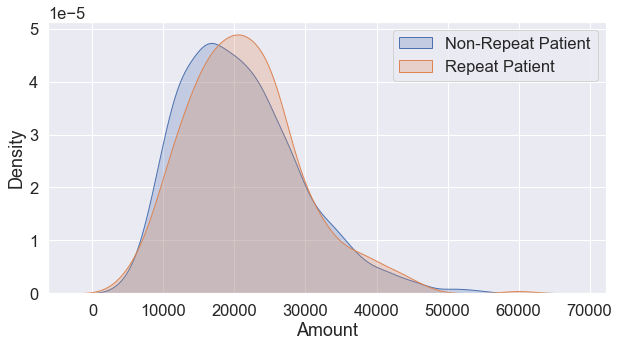

In [489]:
# Is the distribution of amount different for repeat and non-repeat patients?

plt.figure(figsize=(10,5))
plt.xlabel('Amount')
plt.ylabel('Density')
sns.set_style('darkgrid')
sns.kdeplot(single_df['amount'], shade=True, label='Non-Repeat Patient')
sns.kdeplot(repeat_df_1['amount'], shade=True, label='Repeat Patient')
plt.legend()

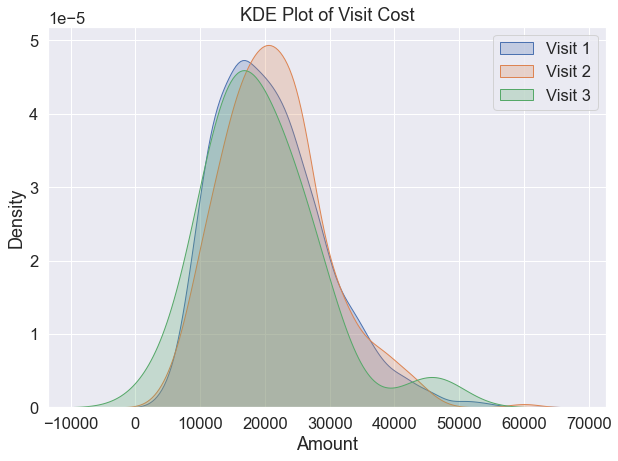

In [498]:
# Does ditribution of amount change based on number of visits?

# filter repeat_df for number of visits

repeat_df2 = repeat_df[repeat_df['visit_number'] == 2.0]
repeat_df3 = repeat_df[repeat_df['visit_number'] == 3.0]
repeat_df4 = repeat_df[repeat_df['visit_number'] == 4.0]


# Density plot for amount column

plt.figure(figsize=(10,7))
plt.xlabel('Amount')
plt.ylabel('Density')
sns.set_style('darkgrid')
sns.kdeplot(single_df['amount'], shade=True, label='Visit 1').set_title('KDE Plot of Visit Cost')
sns.kdeplot(repeat_df2['amount'], shade=True, label='Visit 2')
sns.kdeplot(repeat_df3['amount'], shade=True, label='Visit 3')
plt.legend()

In [185]:
# Do repeat patients pay more in total?

repeat_cost = repeat_df.groupby('patient_id',as_index=False).sum()
repeat_cost = repeat_cost[['patient_id','amount']]
repeat_cost_df = pd.DataFrame(repeat_cost)
repeat_cost_df['repeat_patient'] = 1

repeat_cost_df

patient_id        amount  repeat_patient
0    012c5eb5397a72f8aeb64f942b60846d  51965.601450               1
1    0284ec8aa1e6ced9ddaa7702b841248d  61039.776341               1
2    03d6bdbc614a5bdbeadf5b981a59c423  41798.685146               1
3    050df896aaa8cbad8fc1988bc1f79ebc  59260.216926               1
4    0628639ffb53c8b38389a6e01897a6a5  41455.815691               1
..                                ...           ...             ...
356  fccd4a381191d415eb68548890c90a67  26734.231827               1
357  fdf8e5d36473c09a2700bbceee7196ab  40978.683727               1
358  feb52392f4d58a02254cbd0ba634312f  76513.077896               1
359  ff6de9534e28ea31f928ac79c399ecd6  27447.857342               1
360  ff7a523f1dbd0385e731b4185cf64683  23830.477567               1

[361 rows x 3 columns]

In [186]:
single_cost_df = single_df.loc[:,('patient_id','amount')]
single_cost_df['repeat_patient'] = 0

concat_repeat_df = pd.concat([single_cost_df, repeat_cost_df])

concat_repeat_df

patient_id        amount  repeat_patient
0    00225710a878eff524a1d13be817e8e2   5190.566695               0
1    0029d90eb654699c18001c17efb0f129  22601.497872               0
2    0040333abd68527ecb53e1db9073f52e  17447.181635               0
3    00473b58e3dc8ae37b3cb34069705083  15285.883220               0
6    0092d20dd0719e88ecfdd02d5e7ca7b7  21498.986758               0
..                                ...           ...             ...
356  fccd4a381191d415eb68548890c90a67  26734.231827               1
357  fdf8e5d36473c09a2700bbceee7196ab  40978.683727               1
358  feb52392f4d58a02254cbd0ba634312f  76513.077896               1
359  ff6de9534e28ea31f928ac79c399ecd6  27447.857342               1
360  ff7a523f1dbd0385e731b4185cf64683  23830.477567               1

[2857 rows x 3 columns]

In [227]:
# Show boxplot of total cost by number of visits

amt_cumulative_df = master_df2.copy()
amt_cumulative_df['visit_number'] = amt_cumulative_df.groupby('patient_id')['date_of_admission'].rank(method='dense', ascending=True)
amt_cumulative_df['visit_number'] = amt_cumulative_df['visit_number'].astype('int64')
amt_cumulative_df.sort_values(by=['patient_id', 'visit_number'])

amt_cumulative_df['cumulative_amt'] = amt_cumulative_df.groupby(['patient_id'])['amount'].cumsum()

#drop the single visit_number == 4 row
index_value = amt_cumulative_df[amt_cumulative_df['visit_number'] == 4].index
amt_cumulative_df.drop(index_value, inplace = True)

amt_cumulative_df

patient_id  gender     race        age  weight  \
0     00225710a878eff524a1d13be817e8e2  Female  Chinese  31.231305    66.9   
1     0029d90eb654699c18001c17efb0f129  Female  Chinese  69.069180    89.1   
2     0040333abd68527ecb53e1db9073f52e    Male   Indian  40.400556    79.5   
3     00473b58e3dc8ae37b3cb34069705083  Female  Chinese  37.553133    81.1   
6     0092d20dd0719e88ecfdd02d5e7ca7b7    Male    Malay  65.342889    70.9   
...                                ...     ...      ...        ...     ...   
3395  ffa5a615a4cc5fb1ada0443edc1f5dd3  Female   Indian  34.711185    69.3   
3396  ffac3c4b6838f42625e1dd00dd7c867b    Male  Chinese  52.143439    99.6   
3397  ffc19537fa6621512ef4f296d60896ce    Male  Chinese  74.646297    83.1   
3398  ffd67c2bcfb32508d2cf7b1e1193e2ed    Male    Malay  62.552961    81.3   
3399  ffd9644f8daf1d28493a7cd700bb30f4  Female  Chinese  57.172974    70.7   

      height        bmi resident_status date_of_birth date_of_admission  ...  \
0      155.0  27.845994     Singaporean    1983-01-16        2014-04-10  ...   
1      160.0  34.804687     Singaporean    1943-10-14        2012-11-07  ...   
2      172.0  26.872634     Singaporean    1972-08-26        2013-01-19  ...   
3      160.0  31.679687     Singaporean    1976-07-23        2014-02-10  ...   
6      172.0  23.965657     Singaporean    1947-09-18        2013-01-20  ...   
...      ...        ...             ...           ...               ...  ...   
3395   162.0  26.406036     Singaporean    1976-08-07        2011-04-24  ...   
3396   178.0  31.435425     Singaporean    1963-10-07        2015-11-28  ...   
3397   170.0  28.754325              PR    1938-09-12        2013-05-05  ...   
3398   161.0  31.364531     Singaporean    1950-06-06        2012-12-24  ...   
3399   165.0  25.968779     Singaporean    1956-04-02        2013-06-04  ...   

     medical_history_5  medical_history_6  medical_history_7  symptom_1  \
0                    0                  0                  1          0   
1                    0                  1                  0          0   
2                    0                  0                  1          0   
3                    0                  0                  0          0   
6                    0                  0                  0          1   
...                ...                ...                ...        ...   
3395                 0                  0                  1          0   
3396                 0                  0                  0          1   
3397                 1                  0                  0          0   
3398                 0                  0                  0          1   
3399                 0                  0                  1          1   

      symptom_2  symptom_3  symptom_4  symptom_5  visit_number  cumulative_amt  
0             0          1          0          0             1     5190.566695  
1             1          0          0          1             1    22601.497872  
2             1          0          0          1             1    17447.181635  
3             1          1          1          0             1    15285.883220  
6             1          1          0          0             1    21498.986758  
...         ...        ...        ...        ...           ...             ...  
3395          0          0          0          0             1     4676.066179  
3396          1          0          1          0             1    14049.042774  
3397          0          1          1          1             1    30053.620971  
3398          1          1          1          0             1    28007.636468  
3399          0          1          1          1             1    21040.661990  

[3238 rows x 36 columns]

Text(0.5, 1.0, 'Boxplot for Repeat Visits')

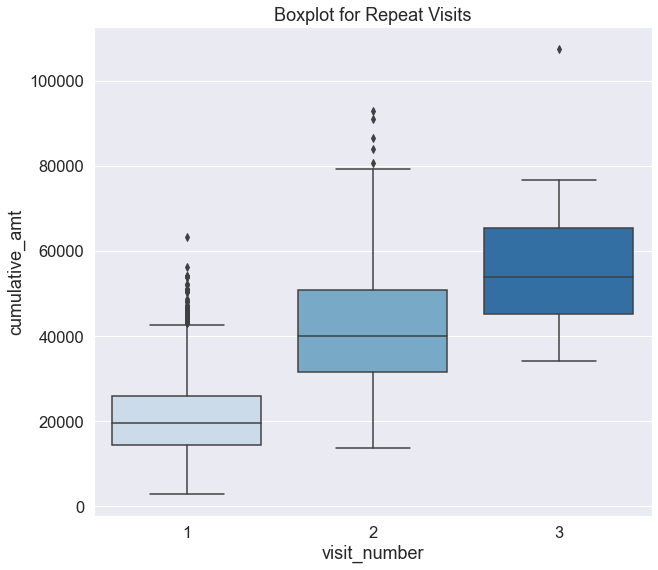

In [466]:
plt.figure(figsize=(10,9))
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
sequential_colors = sns.color_palette("Blues", 3)
sns.boxplot(x="visit_number", y="cumulative_amt", data=amt_cumulative_df, palette=sequential_colors).set_title('Boxplot for Repeat Visits')


In [472]:
# Mean of total costs by number of visits

visits = [1,2,3]

for v in visits:
    mean_1 = amt_cumulative_df[amt_cumulative_df['visit_number'] == v]
    print('Mean Amount of {} Visits: {}'.format(v, mean_1['cumulative_amt'].mean()))


Mean Amount of 1 Visits: 20801.679962613634
Mean Amount of 2 Visits: 42047.57683540248
Mean Amount of 3 Visits: 56590.173358503554


<AxesSubplot:xlabel='visit_number', ylabel='stay_duration'>

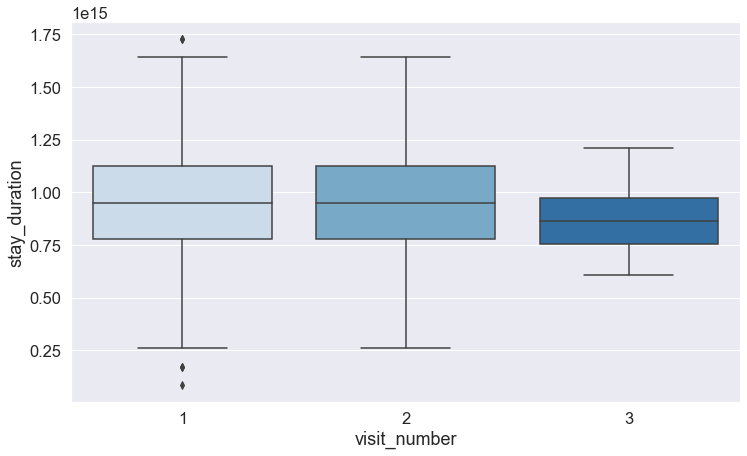

In [490]:
# Does length of stay increase for repeat patients?

plt.figure(figsize=(12,7))
sequential_colors = sns.color_palette("Blues", 3)
sns.boxplot(x="visit_number", y="stay_duration", data=amt_cumulative_df, palette=sequential_colors)

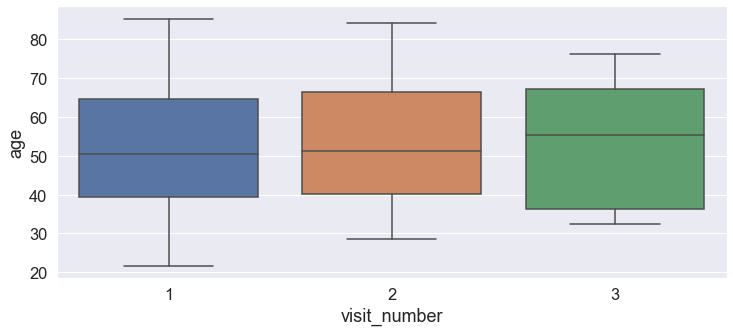

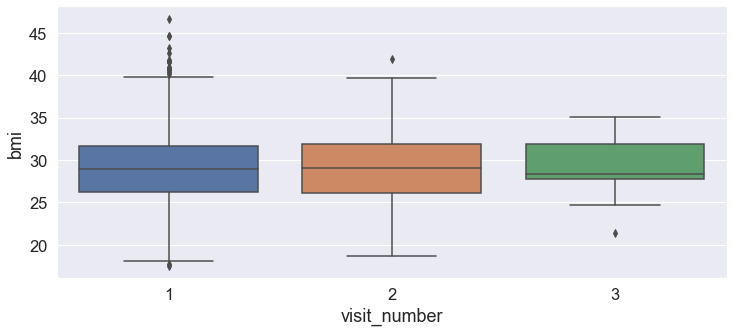

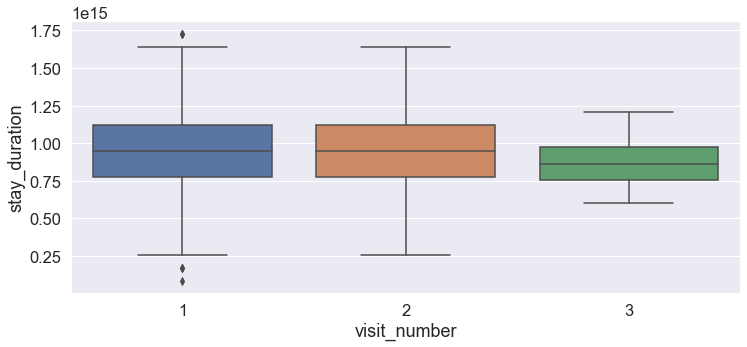

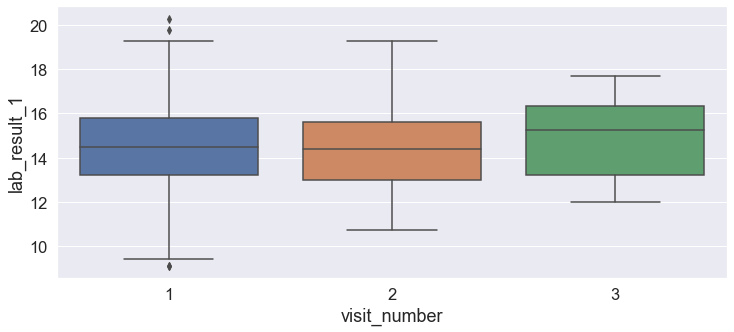

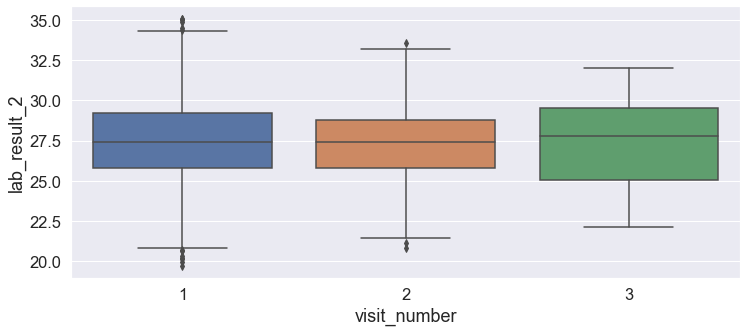

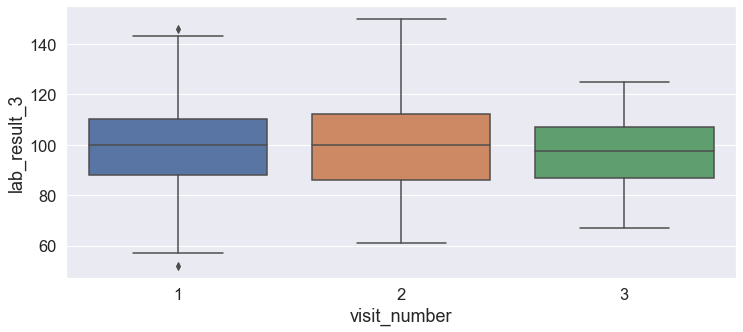

In [491]:
# Are there any factors that point to repeat visits?

continuous_cols = ['age','bmi','stay_duration','lab_result_1','lab_result_2','lab_result_3']

for col in continuous_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(x="visit_number", y=col, data=amt_cumulative_df)